In [2]:
library(stringr)
library(RColorBrewer)
library(parallel)

In [2]:
dir1 = "/path/to/peaks/recluster_final_majorCTs_v2/"

In [3]:
mcells = readLines("/path/to/peaks/recluster_final_majorCTs_v2/celltypes.txt")
mcells

[1] "beta"        "alpha"       "acinar"      "delta"       "gamma"      
 [6] "immune"      "ductal"      "stellate"    "endothelial" "schwann"

Read in cell type barcode assignments

In [4]:
barcodelist = data.frame()
for (b in mcells ){
    bc1 = read.table(paste0(dir1, b,".barcodes"))
    bc1$celltype = b
    
    barcodelist = rbind(barcodelist, bc1)
}
barcodelist

V1,celltype
<chr>,<chr>
R207_AAACAGCCAAACGGGC-1,beta
R207_AAACAGCCATAATCCG-1,beta
R207_AAACATGCACAATGTT-1,beta
R207_AAACATGCAGCACCAT-1,beta
R207_AAACCAACAATTGCGC-1,beta
R207_AAACCAACAGGGAGGA-1,beta
R207_AAACCAACATAGCGAG-1,beta
R207_AAACGGATCCTTAGGG-1,beta
R207_AAACGTACAAAGCGGC-1,beta


In [5]:
dim(barcodelist)

[1] 174819      2

In [6]:
barcodelist$sample = str_split_fixed(barcodelist$V1, "_",2)[,1]
barcodelist

V1,celltype,sample
<chr>,<chr>,<chr>
R207_AAACAGCCAAACGGGC-1,beta,R207
R207_AAACAGCCATAATCCG-1,beta,R207
R207_AAACATGCACAATGTT-1,beta,R207
R207_AAACATGCAGCACCAT-1,beta,R207
R207_AAACCAACAATTGCGC-1,beta,R207
R207_AAACCAACAGGGAGGA-1,beta,R207
R207_AAACCAACATAGCGAG-1,beta,R207
R207_AAACGGATCCTTAGGG-1,beta,R207
R207_AAACGTACAAAGCGGC-1,beta,R207


In [7]:
table(barcodelist$sample, barcodelist$celltype)

      
       acinar alpha beta delta ductal endothelial gamma immune schwann stellate
  R207    580  2025 3229   217     45           8    99     33       0       12
  R217   2489   348 1431   150    614           2   569     10       0        6
  R218    165   227 1496   133     52           2    83      4       2        8
  R221   2389   905 1057   183    294           8    44      5       1       16
  R223    711  1616 3453   225    203           7   101      8       1       18
  R226    815  1492 3242   193     34           2    79      4       0        8
  R228   1746   775  929   134    239          20   114     17       0       67
  R234    374  3036 3067   594     94          10   234     37       1       11
  R237    393  2018 2714   777     75           5   182     24       0       23
  R238    733   702 4288   165    170          17    22     45       0       44
  R246    280   609  568   109     87           2   203      3       0       17
  R247    478  2262 2138   259   

In [8]:
bc = str_split_fixed(barcodelist$V1, "\\_",2)
barcodelist$barcode = paste0("CB:Z:", bc[,2])

barcodelist

V1,celltype,sample,barcode
<chr>,<chr>,<chr>,<chr>
R207_AAACAGCCAAACGGGC-1,beta,R207,CB:Z:AAACAGCCAAACGGGC-1
R207_AAACAGCCATAATCCG-1,beta,R207,CB:Z:AAACAGCCATAATCCG-1
R207_AAACATGCACAATGTT-1,beta,R207,CB:Z:AAACATGCACAATGTT-1
R207_AAACATGCAGCACCAT-1,beta,R207,CB:Z:AAACATGCAGCACCAT-1
R207_AAACCAACAATTGCGC-1,beta,R207,CB:Z:AAACCAACAATTGCGC-1
R207_AAACCAACAGGGAGGA-1,beta,R207,CB:Z:AAACCAACAGGGAGGA-1
R207_AAACCAACATAGCGAG-1,beta,R207,CB:Z:AAACCAACATAGCGAG-1
R207_AAACGGATCCTTAGGG-1,beta,R207,CB:Z:AAACGGATCCTTAGGG-1
R207_AAACGTACAAAGCGGC-1,beta,R207,CB:Z:AAACGTACAAAGCGGC-1


In [9]:
write.table(barcodelist, "/path/to/caQTL/stuff/barcode_celltypes.txt", quote=F, row.names=F)

In [9]:
table(barcodelist$celltype)


     acinar       alpha        beta       delta      ductal endothelial 
      27387       44500       81100        8911        5452         342 
      gamma      immune     schwann    stellate 
       5504         633          68         922 

In [10]:
#I based this off a minimum of 500 cells per type. I think in the past we did 1,000. 
celltypes1 = c('acinar','alpha','beta','delta','ductal','gamma','immune','stellate')

#celltypes2 = c('acinar0', 'acinarREGPOS','alpha_1', "alpha_2",'beta_1','beta_2','beta_3','beta_4','beta_5','ductal0')

barcodelist1 = barcodelist[,c('celltype','sample','barcode')]
#barcodelist2 = subset(barcodelist, subtype %in% celltypes2)[,c('subtype','sample','barcode')]

#colnames(barcodelist2)[1] = colnames(barcodelist1) [1]= "celltype"

#barcodelist = rbind(barcodelist1, barcodelist2)

head(barcodelist)
head(barcodelist1)

,V1,celltype,sample,barcode
,<chr>,<chr>,<chr>,<chr>
1,R207_AAACAGCCAAACGGGC-1,beta,R207,CB:Z:AAACAGCCAAACGGGC-1
2,R207_AAACAGCCATAATCCG-1,beta,R207,CB:Z:AAACAGCCATAATCCG-1
3,R207_AAACATGCACAATGTT-1,beta,R207,CB:Z:AAACATGCACAATGTT-1
4,R207_AAACATGCAGCACCAT-1,beta,R207,CB:Z:AAACATGCAGCACCAT-1
5,R207_AAACCAACAATTGCGC-1,beta,R207,CB:Z:AAACCAACAATTGCGC-1
6,R207_AAACCAACAGGGAGGA-1,beta,R207,CB:Z:AAACCAACAGGGAGGA-1


,celltype,sample,barcode
,<chr>,<chr>,<chr>
1,beta,R207,CB:Z:AAACAGCCAAACGGGC-1
2,beta,R207,CB:Z:AAACAGCCATAATCCG-1
3,beta,R207,CB:Z:AAACATGCACAATGTT-1
4,beta,R207,CB:Z:AAACATGCAGCACCAT-1
5,beta,R207,CB:Z:AAACCAACAATTGCGC-1
6,beta,R207,CB:Z:AAACCAACAGGGAGGA-1


In [11]:
table(barcodelist1$celltype)


     acinar       alpha        beta       delta      ductal endothelial 
      27387       44500       81100        8911        5452         342 
      gamma      immune     schwann    stellate 
       5504         633          68         922 

In [12]:
barcodelist <- barcodelist1

In [13]:
samples = unique(barcodelist$sample)

In [15]:
#samples = c('R207','R217','R218','R223','R226','R228','R234','R238','R275','R284','R290','R316','R317',
#        'R319','R326','R327','R332','R353','R354','R362')

In [15]:
eur_samples = c('R207','R217','R218','R223','R226','R228','R234','R238','R275','R284','R290','R316','R317',
        'R319','R326','R327','R332','R353','R354','R362')
non_eur_samples <- samples[!samples %in% eur_samples]
non_eur_samples

[1] "R221" "R237" "R246" "R247" "R292" "R325" "R363" "R364"

In [16]:
length(samples)

[1] 28

Using barcode list make a bam file for each cluster for each sample

In [18]:
make_cluster_bam = function(s, celltypes, sampdir, outdir) {
     sample = s
     samp_outdir = paste0( outdir,  s, "/")
     system(paste('mkdir -p', samp_outdir)) #Only necessary once
     setwd(samp_outdir)
     bam = paste0(sampdir, s, "/atac_possorted_bam.filt.rmdup.bam" )
     system(paste("samtools view -H", bam ,"> SAM_header")) # Don't need to rerun if repeating process
     system(paste("samtools index", bam )) # Don't need to rerun if repeating processd
    
    for (cell in celltypes) {
        barcodes = barcodelist$barcode[barcodelist$sample==sample & barcodelist$celltype==cell]
        writeLines(barcodes, cell)
        system(paste('samtools view', bam , '| LC_ALL=C grep -F -f', cell , '> filtered_SAM_body'))
        system("cat SAM_header filtered_SAM_body > filtered.sam")
        system(paste0("samtools view -b filtered.sam > ", sample, "_",cell, ".bam"))
        system('rm filtered.sam filtered_SAM_body')
        system(paste0("samtools index ", sample, "_",cell, ".bam"))
    }    
}

In [22]:
celltypes = unique(barcodelist$celltype)
celltypes

[1] "beta"        "alpha"       "acinar"      "delta"       "gamma"      
 [6] "immune"      "ductal"      "stellate"    "endothelial" "schwann"

In [20]:
sampdir = "/path/to/dedup_bams/"
outdir  = "/path/to/caQTLs/stuff/"

#mclapply(samples, function(x) make_cluster_bam(s=x, celltypes=celltypes, sampdir=sampdir ,outdir=outdir) , mc.cores = 20) 
mclapply(samples, function(x) make_cluster_bam(s=x, celltypes=celltypes, sampdir=sampdir ,outdir=outdir) , mc.cores = 8) 

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

[[10]]
NULL

[[11]]
NULL

[[12]]
NULL

[[13]]
NULL

[[14]]
NULL

[[15]]
NULL

[[16]]
NULL

[[17]]
NULL

[[18]]
NULL

[[19]]
NULL

[[20]]
NULL

[[21]]
NULL

[[22]]
NULL

[[23]]
NULL

[[24]]
NULL

[[25]]
NULL

[[26]]
NULL

[[27]]
NULL

[[28]]
NULL

In [22]:
non_eur_samples
samples

[1] "R221" "R237" "R246" "R247" "R292" "R325" "R363" "R364"

[1] "R207" "R217" "R218" "R221" "R223" "R226" "R228" "R234" "R237" "R238"
[11] "R246" "R247" "R275" "R284" "R290" "R292" "R316" "R317" "R319" "R325"
[21] "R326" "R327" "R332" "R353" "R354" "R362" "R363" "R364"

### Prepare matrices

In [24]:
bedir = '/path/to/caQTLs/stuff/'

saf = paste0(bedir, 'mergedPeak.saf')
mergedPeaks = paste0(dir1, 'mergedPeak.txt')

system(paste('python3 /scritp/found/at/convert_bed_to_saf.py', 
              mergedPeaks, saf))



In [28]:
matdir = '/path/to/caQTLs/stuff/atac_cell_type_matrices/'

sampdir = "/path/to/bams/dedup_bams/"
outdir  = "/path/to/caQTLs/stuff/"

featurecounts = function(c){

count_matrix  = paste0(matdir ,c, '.count_matrix')    
bam           = paste0(outdir, samples, "/", samples, "_",c, ".bam")
gi  <-  paste("featureCounts -p -T 10 -F SAF --donotsort -a" , saf, "-o",  count_matrix , 
                paste(bam,collapse=" "))
system(gi)
}

In [29]:
mclapply(celltypes,featurecounts, mc.cores = 14 )

[[1]]
[1] 0

[[2]]
[1] 0

[[3]]
[1] 0

[[4]]
[1] 0

[[5]]
[1] 0

[[6]]
[1] 0

[[7]]
[1] 0

[[8]]
[1] 0

[[9]]
[1] 0

[[10]]
[1] 0

#### Make pseudobulk-matrix

In [30]:
c = 'bulk'

count_matrix  =  paste0(matdir ,c, '.count_matrix')    
bam           =  paste0(sampdir, samples, "/atac_possorted_bam.filt.rmdup.bam" )
gi  <-  paste("featureCounts -p -T 10 -F SAF --donotsort -a" , saf, "-o",  count_matrix , 
                paste(bam,collapse=" "))
system(gi)


In [31]:
celltypes

[1] "beta"        "alpha"       "acinar"      "delta"       "gamma"      
 [6] "immune"      "ductal"      "stellate"    "endothelial" "schwann"

#### 2. Filter the read count matrix and use rasqual tools to generate the input files

In [32]:
install.packages("devtools")

Installing package into ‘/home/welison/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



In [17]:
library("devtools")

Loading required package: usethis



In [32]:
#devtools::install_github("kauralasoo/rasqual/rasqualTools")

Skipping install of 'rasqualTools' from a github remote, the SHA1 (05c3a1e3) has not changed since last install.
  Use `force = TRUE` to force installation



In [6]:
library("rasqualTools")
source("/scripts/rasqual_tools_functions.R")

In [19]:
samples = unique(barcodelist$sample)

eur_samples = c('R207','R217','R218','R223','R226','R228','R234','R238','R275','R284','R290','R316','R317',
        'R319','R326','R327','R332','R353','R354','R362')

samples
non_eur_samples <- samples[!samples %in% eur_samples]
non_eur_samples

[1] "R207" "R217" "R218" "R221" "R223" "R226" "R228" "R234" "R237" "R238"
[11] "R246" "R247" "R275" "R284" "R290" "R292" "R316" "R317" "R319" "R325"
[21] "R326" "R327" "R332" "R353" "R354" "R362" "R363" "R364"

[1] "R221" "R237" "R246" "R247" "R292" "R325" "R363" "R364"

# Check PCA plots for outliers

Removed outliers based on their SD in the first two PCs

In [36]:
###remove sample R364 = outlier

In [5]:
library(patchwork)

In [37]:
#celltypes = c("bulk",celltypes)
celltypes = celltypes[celltypes!='schwann']
celltypes

[1] "bulk"        "beta"        "alpha"       "acinar"      "delta"      
 [6] "gamma"       "immune"      "ductal"      "stellate"    "endothelial"

In [24]:
samples_no_outliers <- samples[samples != 'R364']

samples_no_outliers

[1] "R207" "R217" "R218" "R221" "R223" "R226" "R228" "R234" "R237" "R238"
[11] "R246" "R247" "R275" "R284" "R290" "R292" "R316" "R317" "R319" "R325"
[21] "R326" "R327" "R332" "R353" "R354" "R362" "R363"

In [25]:
matdir = '/path/to/caQTLs/stuff//atac_cell_type_matrices/'


In [26]:
length(samples)

[1] 28

In [27]:
### Function to calculate if any samples are clear outliers along a PC embedding
identify_outlier_samples <- function(embed, pc, sd_cutoff=3){
    # Read in PC embedding dataframe 
    data <- embed
    
    # Convert PC embeds to z-scores
    embeds <- data[,pc]
    names(embeds) <- row.names(data)
    zscores <- (embeds - mean(embeds))/sd(embeds)
    
    # Gather outlier samples
    outliers <- names(zscores[abs(zscores) >= sd_cutoff])
    
    # If there are any outliers, adjust data structures to remove them
    if (length(outliers) > 0){
        print(paste0('Outlier samples found for ', pc, ': ', outliers))
    }
    return(outliers)
}

In [ ]:

for (c in celltypes){
#for (c in 'beta'){
    outfolder     = matdir
    cm = read.table(paste0(outfolder, c, '.count_matrix') , header=T)
    colnames(cm)[7:ncol(cm)] = samples
        
    cm <- cm[,c(1:6, which(colnames(cm) %in% samples))]
    
    #### subset to europeans only
    #cm = subset(cm, select = as.character(c(colnames(cm)[1:6], eur)))                   
    #c = paste0("eur_",c)    
        
    ### filter for peaks having a minumum of 5 reads on avg per sample
    cm = cm[rowMeans(cm[,7:ncol(cm)])>= 5, ]
    
    fmat           = cm[,7:ncol(cm)]
    rownames(fmat) = cm[,1]
    filtbed        = paste0(outfolder, c, ".filtered.bed")
    write.table(fmat, paste0(outfolder, c, ".filtered.count_matrix"), sep="\t", quote=F)
    write.table(cm[,2:4],filtbed, sep="\t", quote=F, col.names=F, row.names=F)
    cc     = cm[,2:4]
    cc[,1] = substring(cc[,1],4)
    write.table(cc, paste0(outfolder, c, ".filtered.nochr.bed"), sep="\t", quote=F, col.names=F, row.names=F)
    
    system(paste0("bedtools slop -i ",  filtbed,  " -b 100000 -g /publicdata/hg38.chrom.sizes > ",
             filtbed, '.100kb'))
    
    system(paste0("bedtools merge -i ", filtbed, '.100kb > ', filtbed, '.100kb.merged'))
    
    fb     = read.table(paste0( filtbed, '.100kb.merged'))
    fb[,1] = substring(fb[,1],4)
    write.table(fb, paste0( filtbed, '.100kb.merged.nochr'), sep="\t", quote=F, col.names=F, row.names=F)
    
    #### RAsqualTools
    
    saveRasqualMatrices(list(counts = fmat), outfolder, file_suffix = c)
    
    size_factors = rasqualCalculateSampleOffsets(fmat, gc_correct = FALSE)
    saveRasqualMatrices(list(size_factors = size_factors),  outfolder, file_suffix = c)
    
    y = paste0(outfolder, "counts.",c, ".txt" )
    k = paste0(outfolder, "size_factors.",c, ".txt" )
    x = paste0(outfolder, "covariates.",c, ".txt" )
    
    write.table(samples, paste0(outfolder, "samples.",c, ".csv" ), sep=',')
        
    make_covariates(ytxt=y, ktxt=k, outfile=x)
    
    txt2bin(ytxt=y, ktxt=k, xtxt=x)
}

In [9]:
??make_covariates

No vignettes or demos or help files found with alias or concept or
title matching ‘make_covariates’ using regular expression matching.

In [39]:
library(ggplot2)
library(ggrepel)

Warning message:
“ggrepel: 17 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


[1] "bulk"
[1] "Outlier samples found for PC1: R364"


Warning message:
“ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


[1] "beta"
[1] "Outlier samples found for PC1: R364"
[1] "Outlier samples found for PC4: R325"


Warning message:
“ggrepel: 17 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


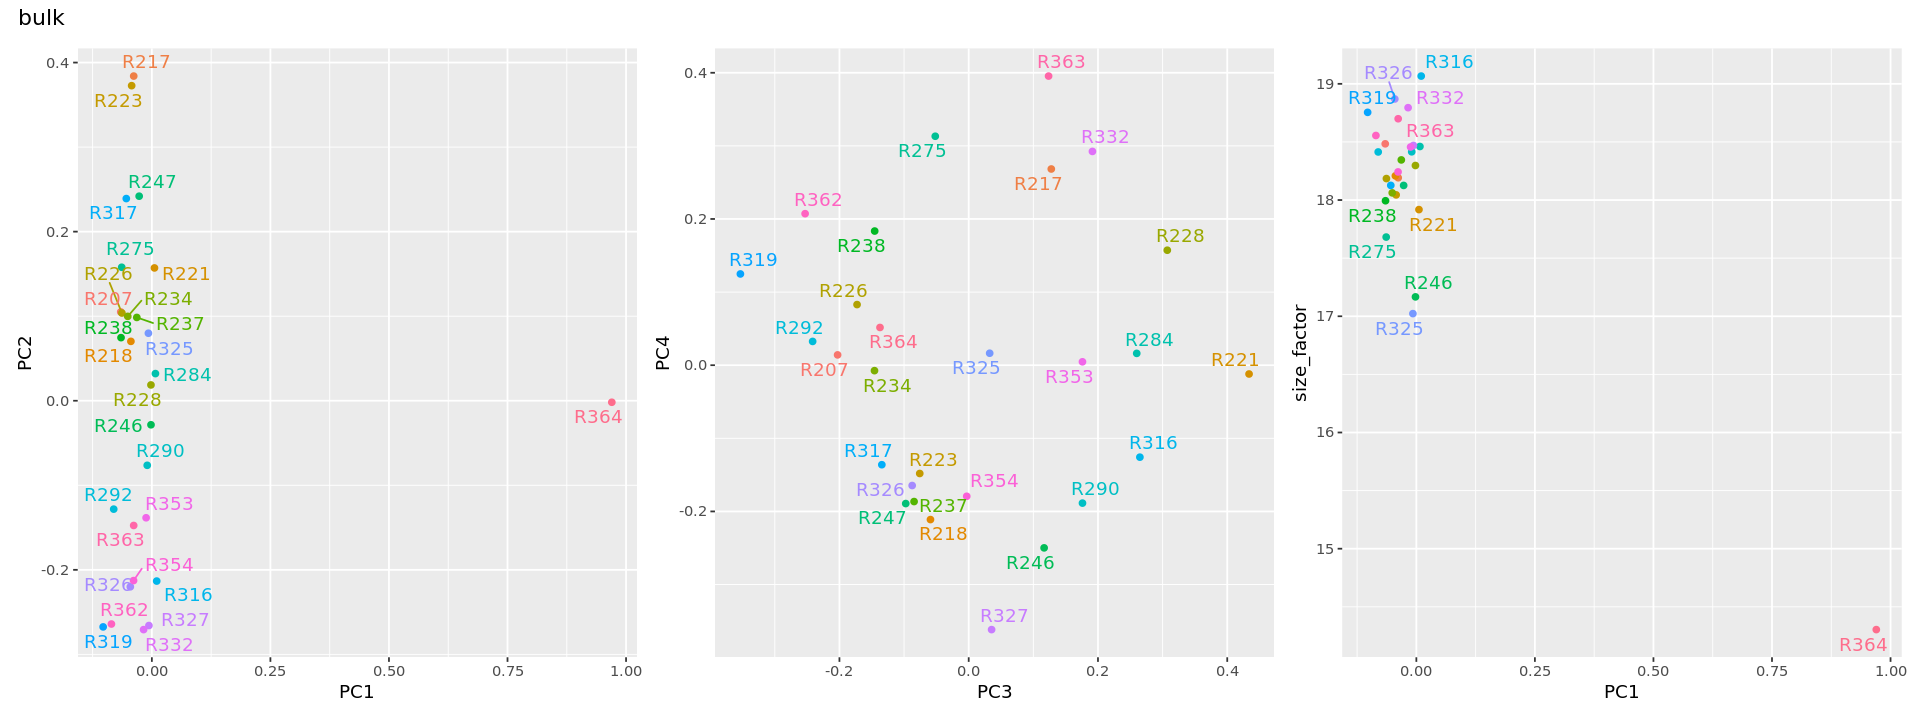

Warning message:
“ggrepel: 16 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


[1] "alpha"
[1] "Outlier samples found for PC1: R364"
[1] "Outlier samples found for PC4: R218"


Warning message:
“ggrepel: 11 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


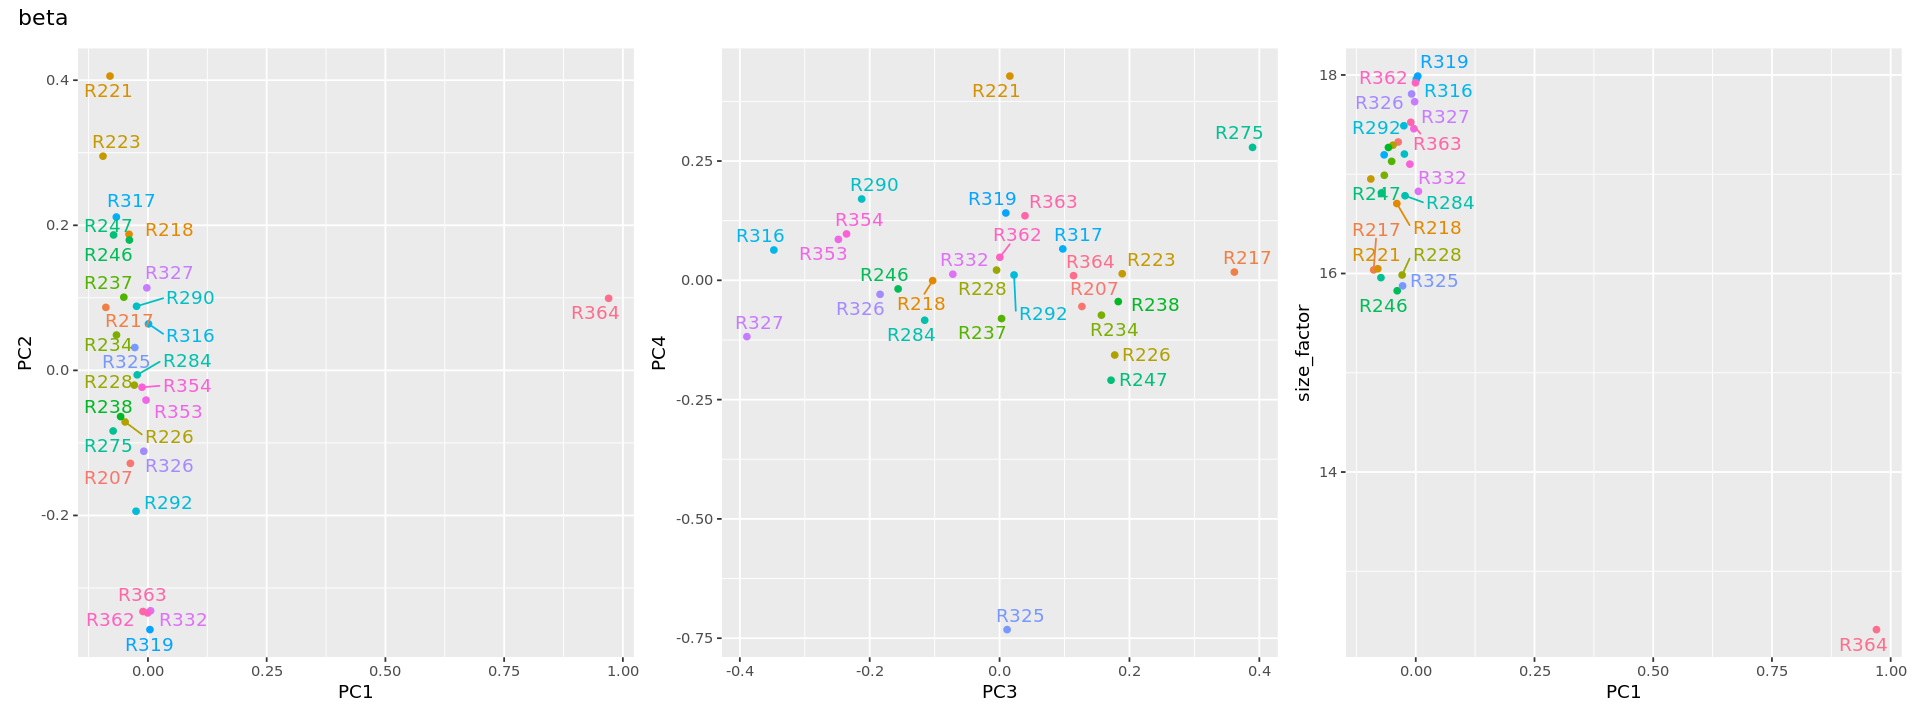

Warning message:
“ggrepel: 19 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


[1] "acinar"
[1] "Outlier samples found for PC1: R364"
[1] "Outlier samples found for PC3: R292"
[1] "Outlier samples found for PC4: R317"


Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


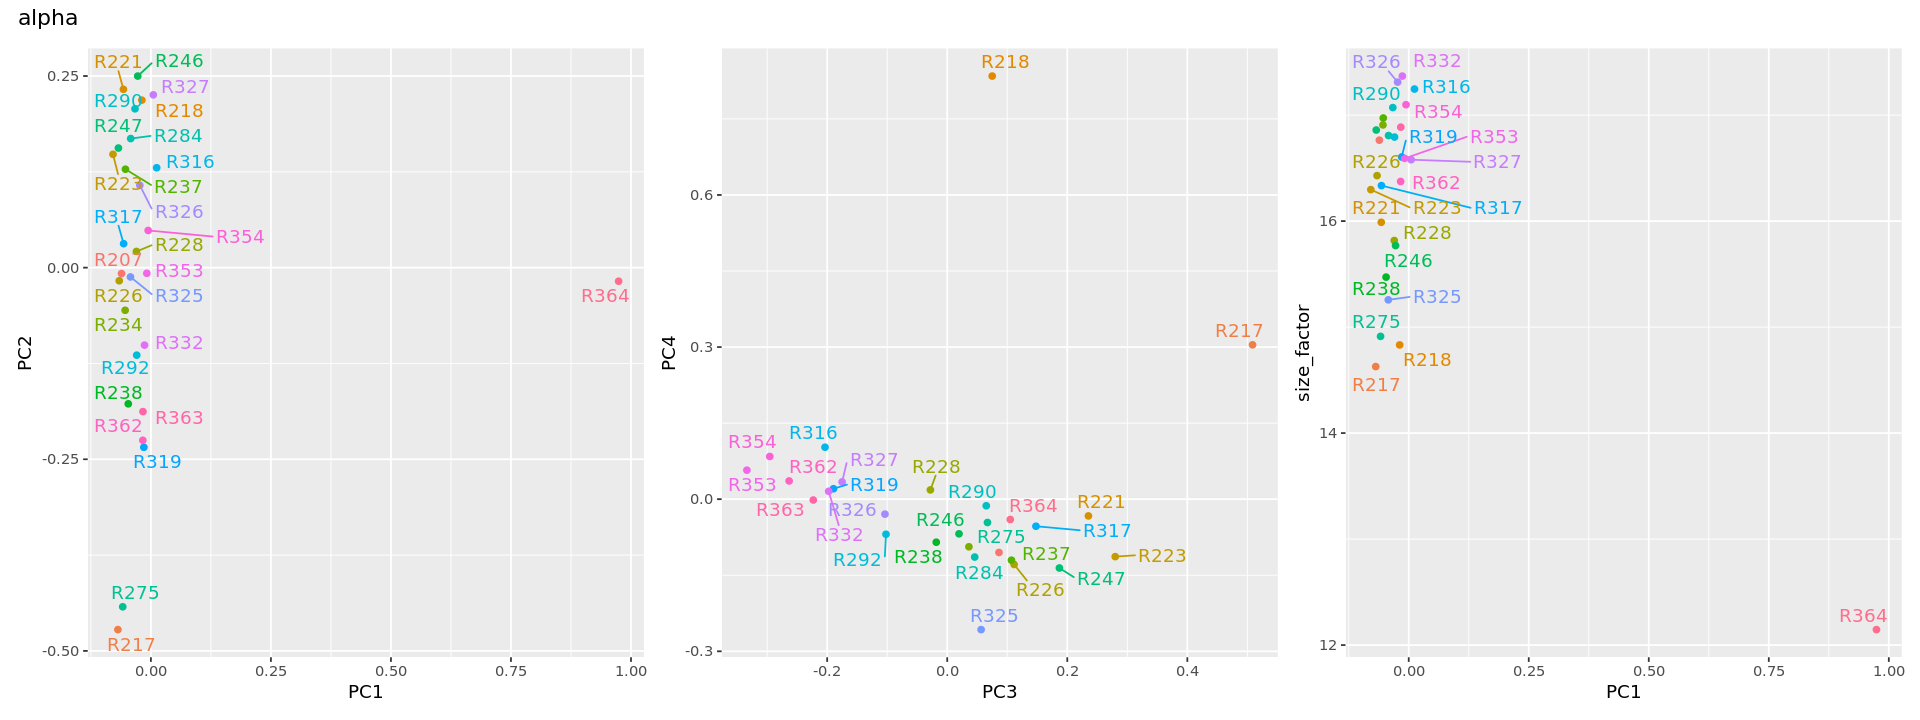

Warning message:
“ggrepel: 26 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


[1] "delta"
[1] "Outlier samples found for PC1: R364"
[1] "Outlier samples found for PC2: R325"


Warning message:
“ggrepel: 17 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


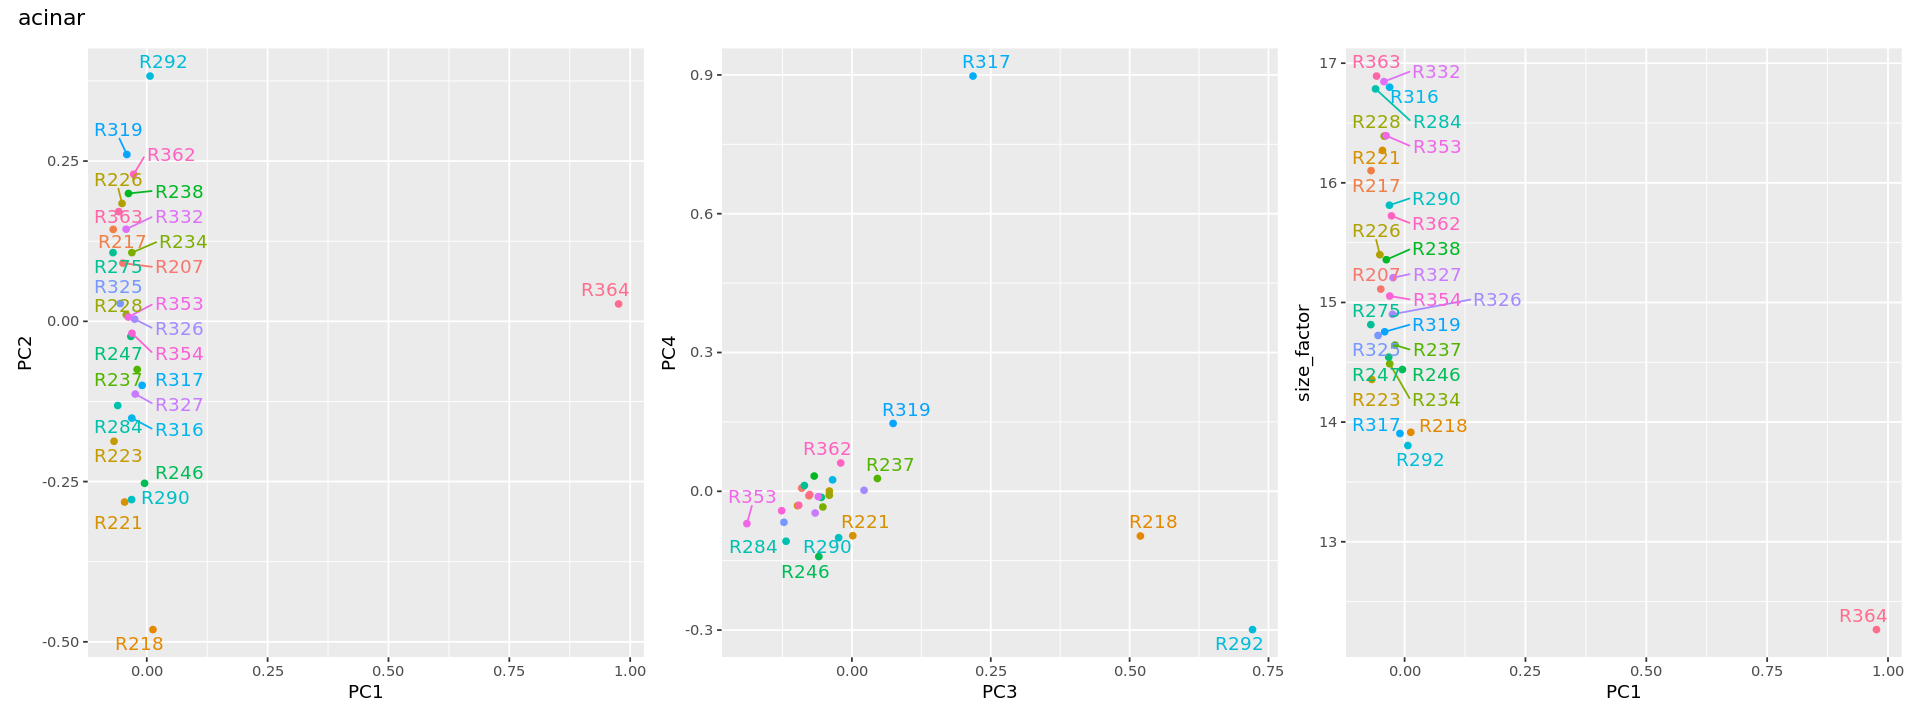

Warning message:
“ggrepel: 25 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 19 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


[1] "gamma"
[1] "Outlier samples found for PC1: R364"
[1] "Outlier samples found for PC2: R247"
[1] "Outlier samples found for PC3: R238"
[1] "Outlier samples found for PC4: R363"


Warning message:
“ggrepel: 26 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


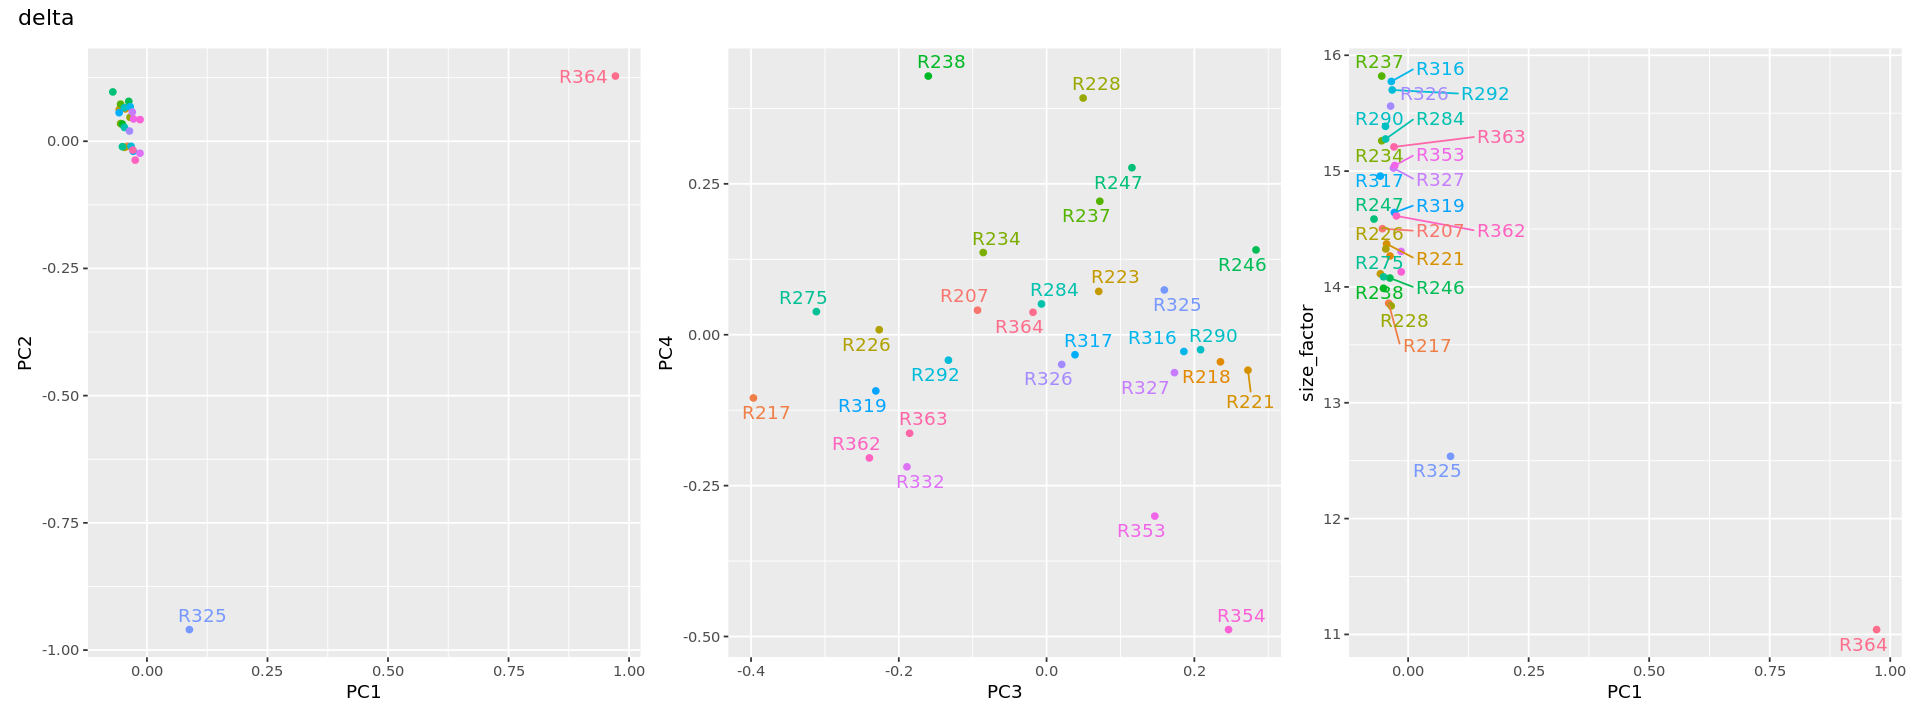

Warning message:
“ggrepel: 21 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 21 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


[1] "immune"
[1] "Outlier samples found for PC1: R364"
[1] "Outlier samples found for PC2: R218" "Outlier samples found for PC2: R223"
[1] "Outlier samples found for PC3: R218" "Outlier samples found for PC3: R223"
[1] "Outlier samples found for PC4: R221"


Warning message:
“ggrepel: 25 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 21 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


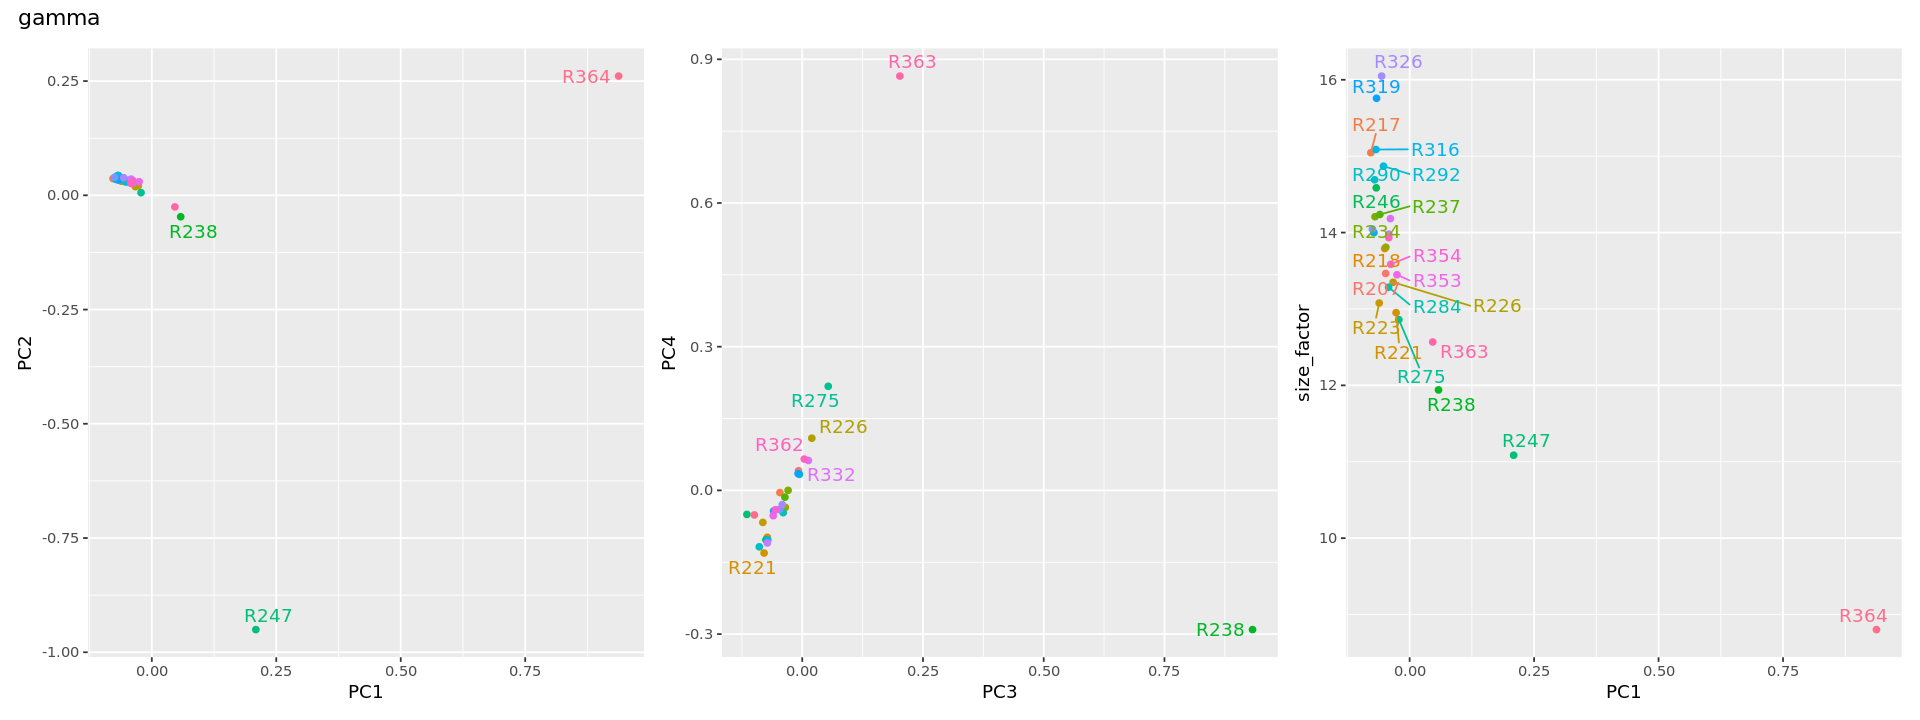

Warning message:
“ggrepel: 21 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 13 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


[1] "ductal"
[1] "Outlier samples found for PC1: R364"
[1] "Outlier samples found for PC2: R226"
[1] "Outlier samples found for PC3: R317"
[1] "Outlier samples found for PC4: R207"


Warning message:
“ggrepel: 21 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 22 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


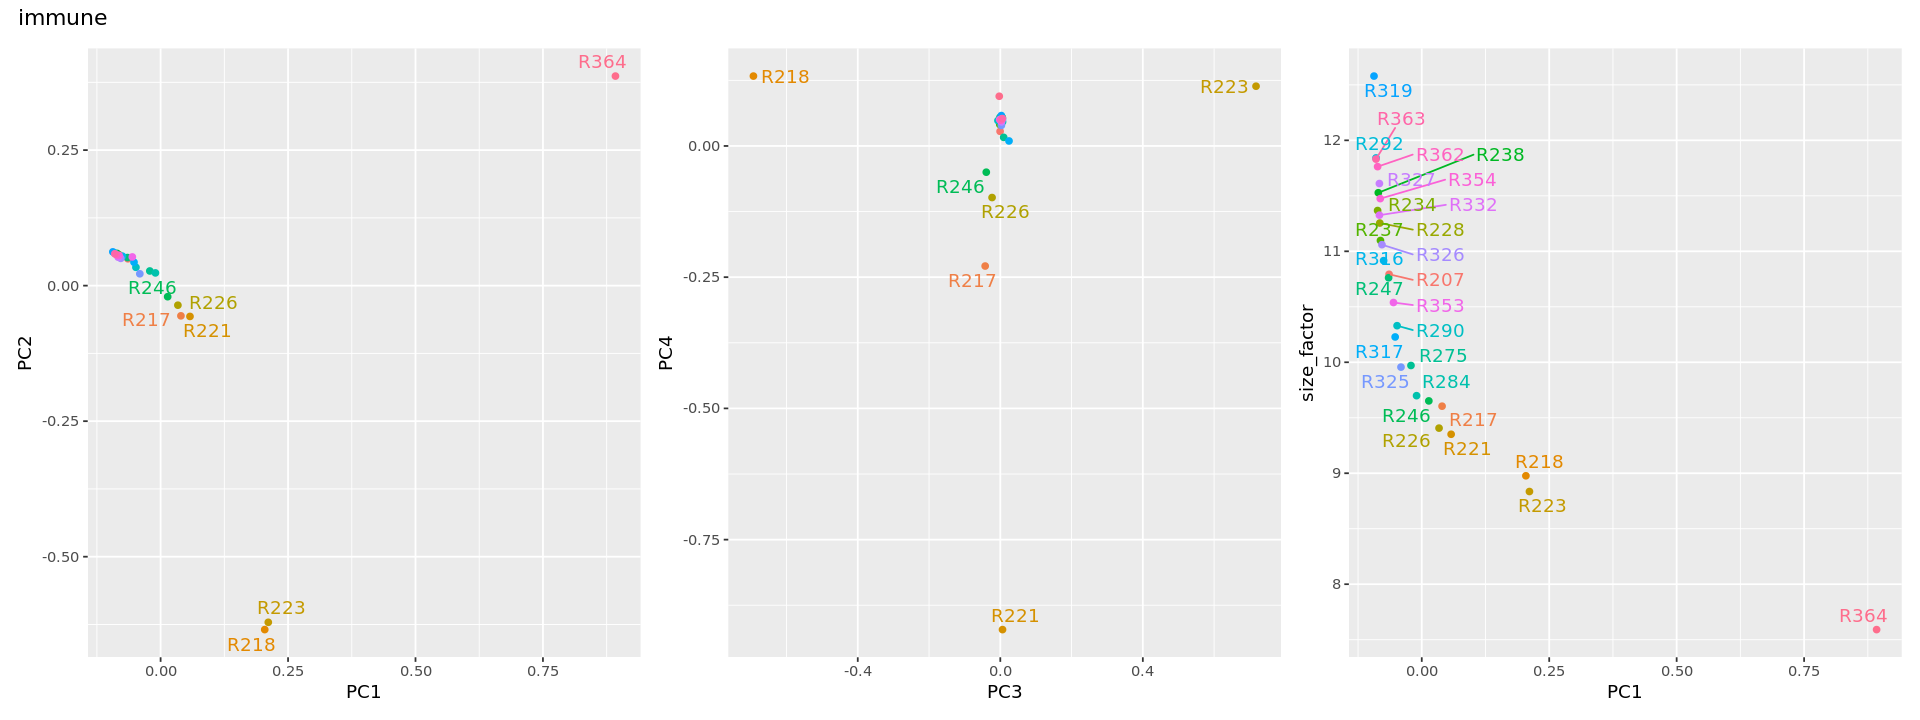

Warning message:
“ggrepel: 26 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 24 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


[1] "stellate"
[1] "Outlier samples found for PC1: R364"
[1] "Outlier samples found for PC2: R217" "Outlier samples found for PC2: R364"
[1] "Outlier samples found for PC3: R226"
[1] "Outlier samples found for PC4: R234"


Warning message:
“ggrepel: 21 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


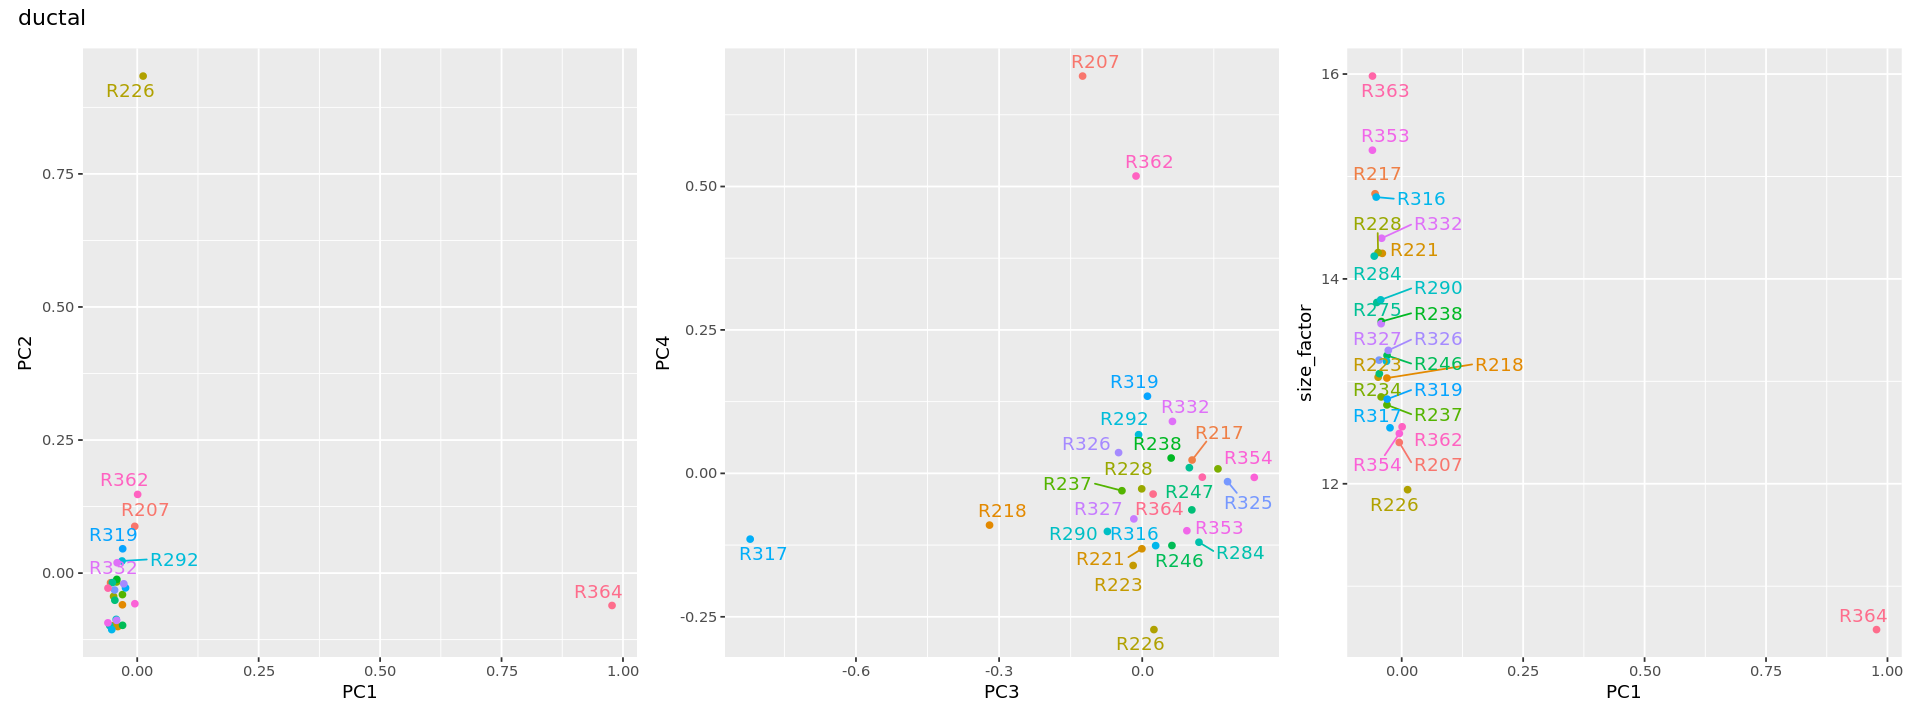

Warning message:
“ggrepel: 25 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 24 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


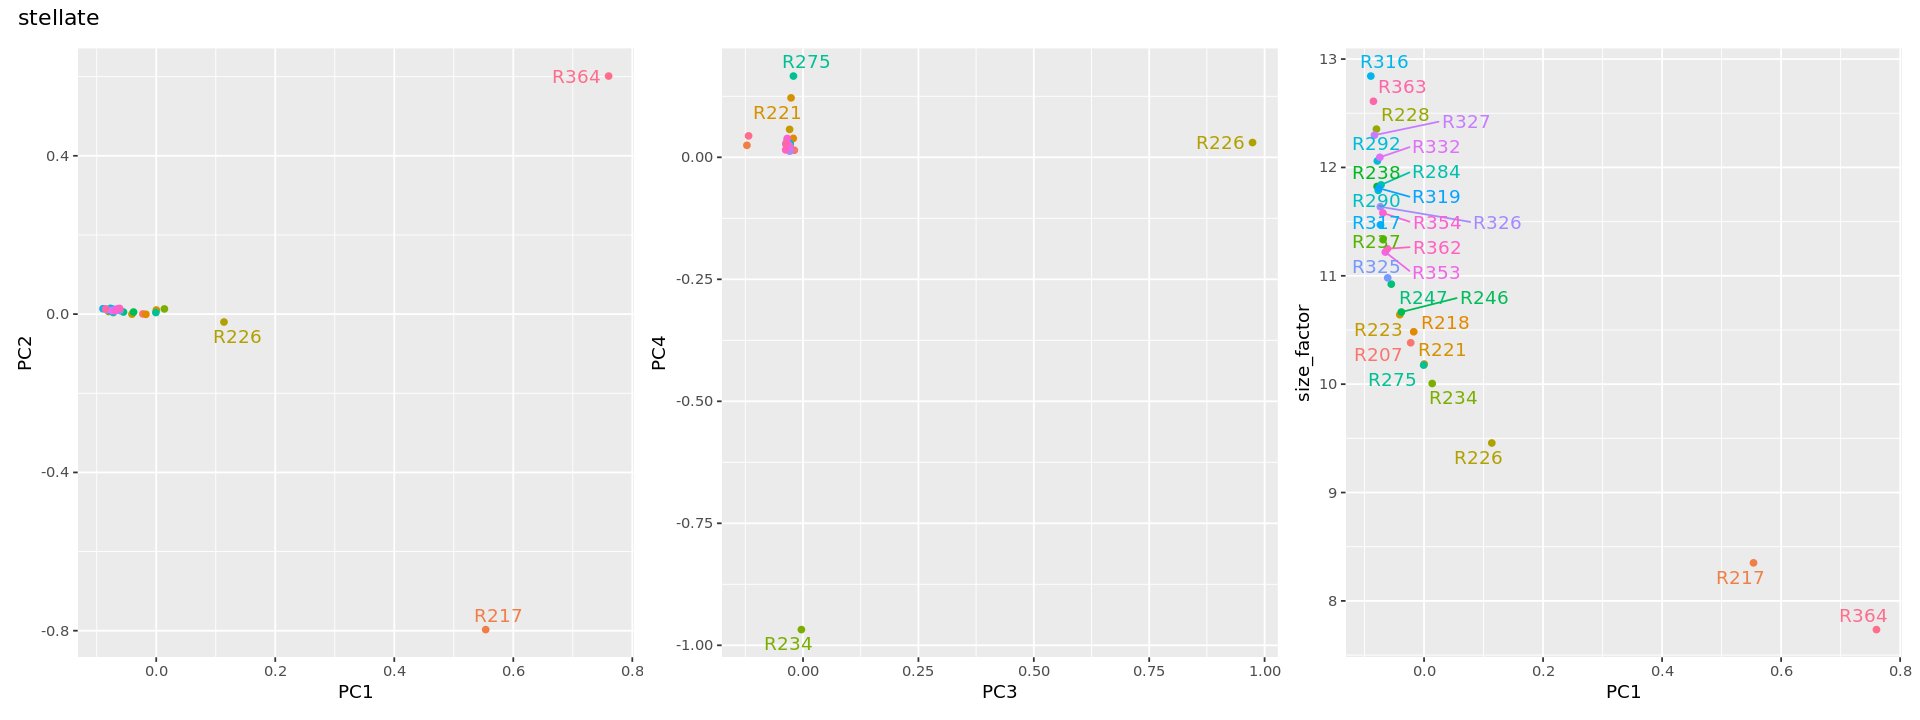

[1] "endothelial"
[1] "Outlier samples found for PC1: R364"
[1] "Outlier samples found for PC2: R226"
[1] "Outlier samples found for PC3: R217"
[1] "Outlier samples found for PC4: R246"


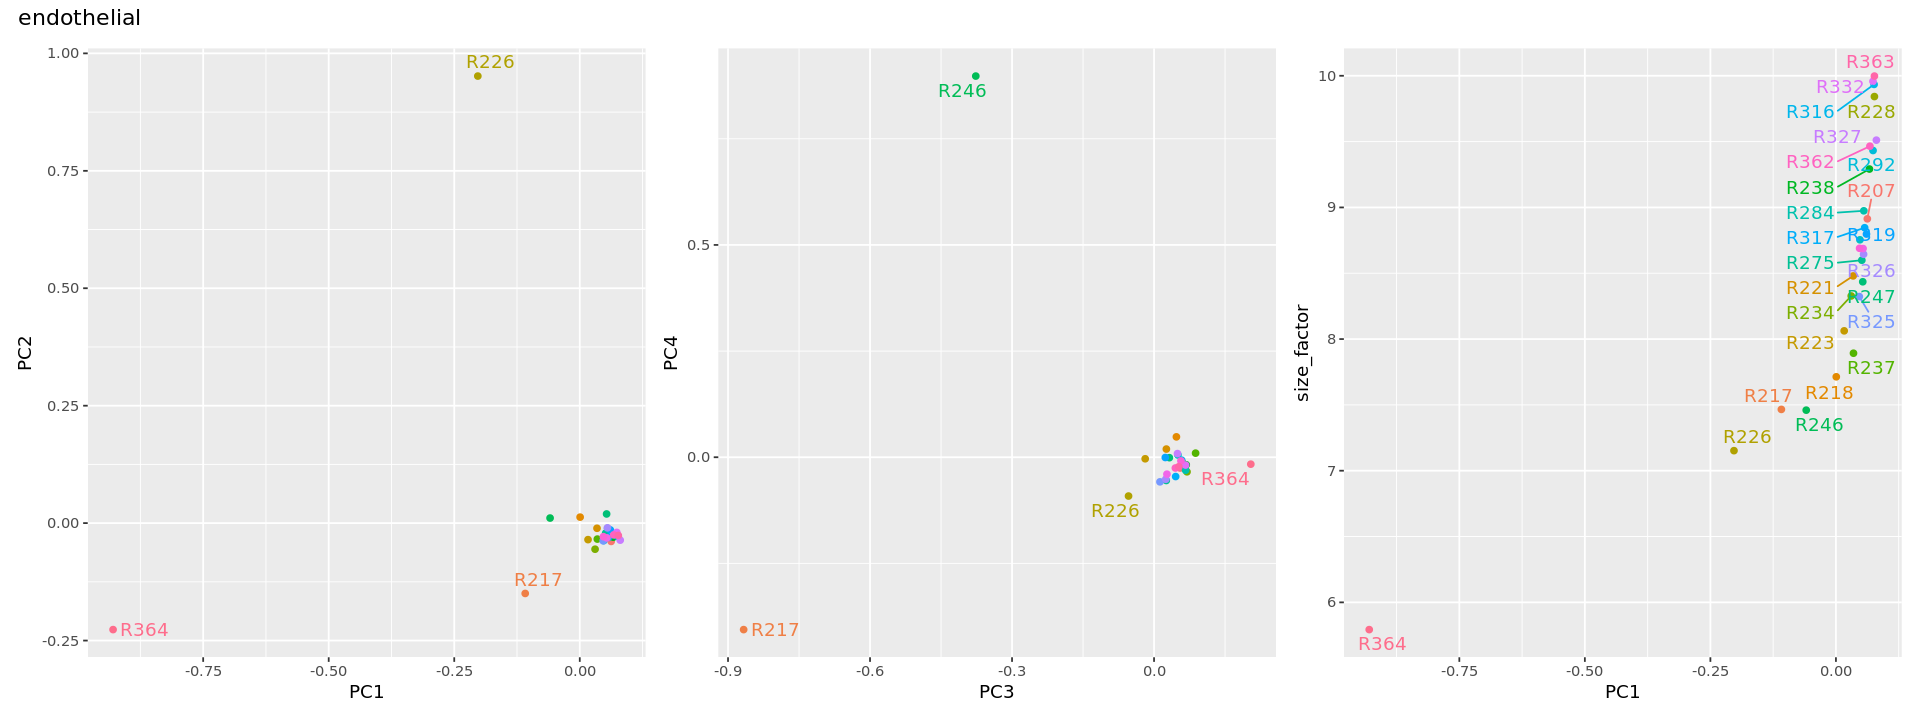

In [40]:
#Iteration #1

options(repr.plot.width=16, repr.plot.height=6)
for (c in celltypes){
    outfolder     = matdir
    pca = read.table(paste0(outfolder, "/covariates.",c, ".txt" ))
    
    if (mean(pca$V1) > 2) {
        colnames(pca) <- c('size_factor', paste0('PC', 1:(ncol(pca) - 1)))
    }else {
        colnames(pca) <- paste0('PC', 1:(ncol(pca)))
    }
    
    pca$labels <- samples
       
    p1 <- ggplot(pca, aes(x=PC1, y=PC2, col=samples, label=samples)) + geom_point() + geom_text_repel() + theme(legend.position = "none")
    p2 <- ggplot(pca, aes(x=PC3, y=PC4, col=samples, label=samples)) + geom_point() + geom_text_repel() + theme(legend.position = "none")
    p3 <- ggplot(pca, aes(x=PC1, y=size_factor, col=samples, label=samples)) + geom_point() + geom_text_repel() + theme(legend.position = "none")
        
    print(p1 + p2 + p3 + plot_annotation(title = c))
    #print(p1)
    #print(p1 + p2)
    ##Check for outliers
    rownames(pca) <- samples
    
    print(c)
    identify_outlier_samples(pca, 'PC1')
    identify_outlier_samples(pca, 'PC2')
    identify_outlier_samples(pca, 'PC3')
    identify_outlier_samples(pca, 'PC4')
}

In [ ]:

for (c in celltypes){
#for (c in 'beta'){
    samples_no_outliers <- samples[samples != 'R364']
    
    if (c == 'delta') {
        samples_no_outliers <- samples_no_outliers[samples_no_outliers != 'R325']
    } 
    if (c == 'gamma') {
        samples_no_outliers <- samples_no_outliers[samples_no_outliers != 'R247']
    }
    if (c == 'immune') {
        samples_no_outliers <- samples_no_outliers[samples_no_outliers != 'R218' & samples_no_outliers != 'R223']
    } 
    if (c == 'ductal') {
        samples_no_outliers <- samples_no_outliers[samples_no_outliers != 'R226']
    } 
    if (c == 'stellate') {
        samples_no_outliers <- samples_no_outliers[samples_no_outliers != 'R217']
    } 
    if (c == 'stellate') {
        samples_no_outliers <- samples_no_outliers[samples_no_outliers != 'R226']
    } 
    outfolder     = matdir
    cm = read.table(paste0(outfolder, c, '.count_matrix') , header=T)
    colnames(cm)[7:ncol(cm)] = samples
        
    cm <- cm[,c(1:6, which(colnames(cm) %in% samples_no_outliers))]
    
    #### subset to europeans only
    #cm = subset(cm, select = as.character(c(colnames(cm)[1:6], eur)))                   
    #c = paste0("eur_",c)    
        
    ### filter for peaks having a minumum of 5 reads on avg per sample
    cm = cm[rowMeans(cm[,7:ncol(cm)])>= 5, ]
    
    fmat           = cm[,7:ncol(cm)]
    rownames(fmat) = cm[,1]
    filtbed        = paste0(outfolder, c, ".filtered.bed")
    write.table(fmat, paste0(outfolder, c, ".filtered.count_matrix"), sep="\t", quote=F)
    write.table(cm[,2:4],filtbed, sep="\t", quote=F, col.names=F, row.names=F)
    cc     = cm[,2:4]
    cc[,1] = substring(cc[,1],4)
    write.table(cc, paste0(outfolder, c, ".filtered.nochr.bed"), sep="\t", quote=F, col.names=F, row.names=F)
    
    system(paste0("bedtools slop -i ",  filtbed,  " -b 100000 -g //publicdata/hg38.chrom.sizes > ",
             filtbed, '.100kb'))
    
    system(paste0("bedtools merge -i ", filtbed, '.100kb > ', filtbed, '.100kb.merged'))
    
    fb     = read.table(paste0( filtbed, '.100kb.merged'))
    fb[,1] = substring(fb[,1],4)
    write.table(fb, paste0( filtbed, '.100kb.merged.nochr'), sep="\t", quote=F, col.names=F, row.names=F)
    
    #### RAsqualTools
    
    saveRasqualMatrices(list(counts = fmat), outfolder, file_suffix = c)
    
    size_factors = rasqualCalculateSampleOffsets(fmat, gc_correct = FALSE)
    saveRasqualMatrices(list(size_factors = size_factors),  outfolder, file_suffix = c)
    
    y = paste0(outfolder, "counts.",c, ".txt" )
    k = paste0(outfolder, "size_factors.",c, ".txt" )
    x = paste0(outfolder, "covariates.",c, ".txt" )
    
    write.table(samples_no_outliers, paste0(outfolder, "samples.",c, ".csv" ), sep=',')
        
    make_covariates(ytxt=y, ktxt=k, outfile=x)
    
    txt2bin(ytxt=y, ktxt=k, xtxt=x)
}

[1] "bulk"


Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


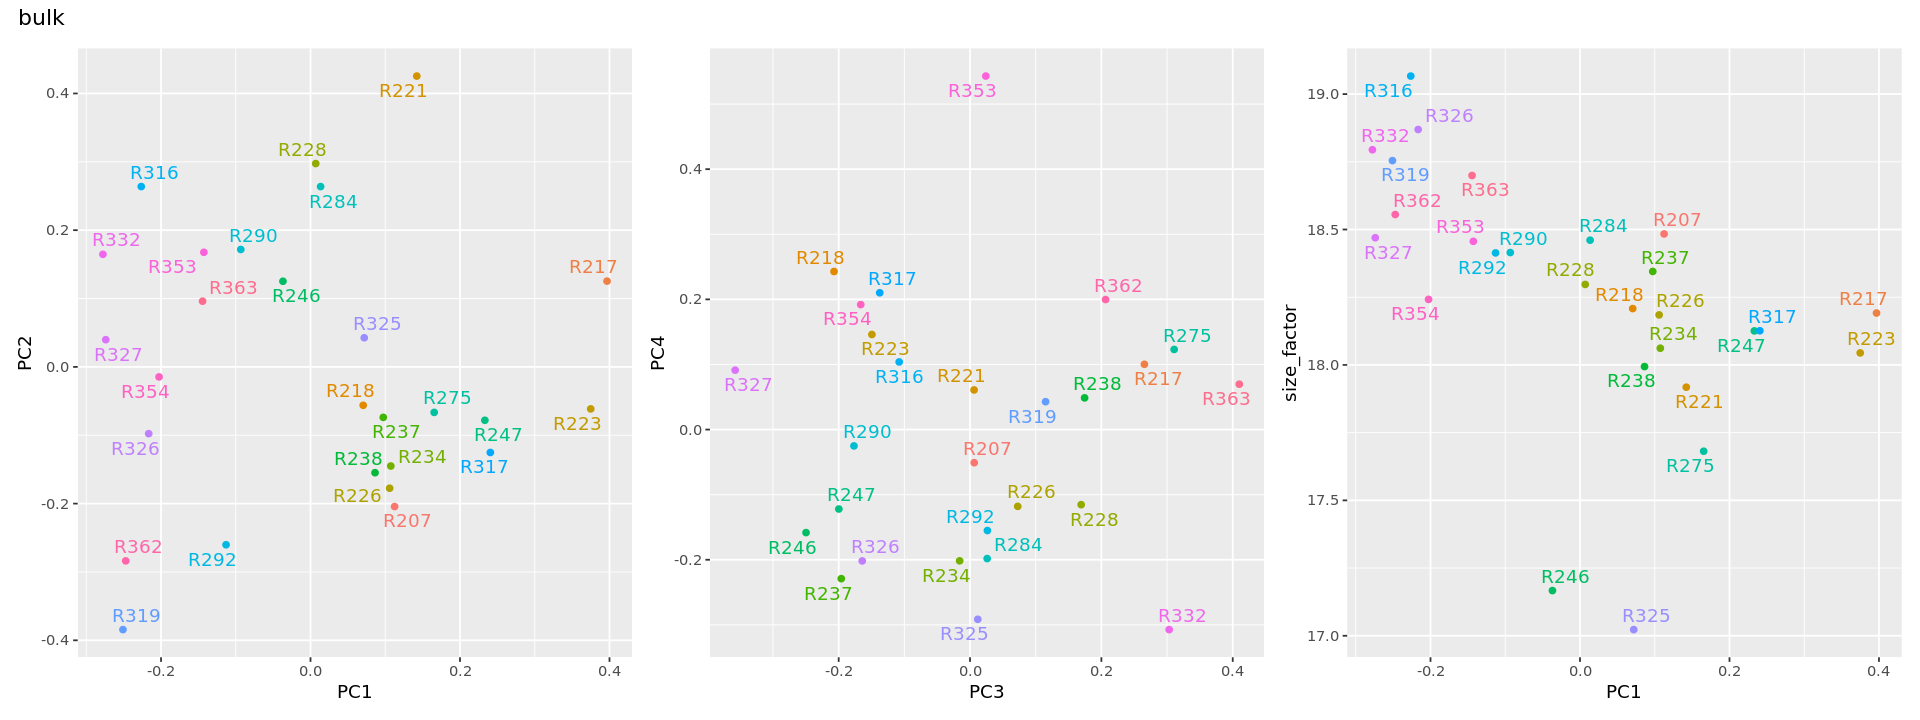

[1] "beta"
[1] "Outlier samples found for PC3: R325"


Warning message:
“ggrepel: 16 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


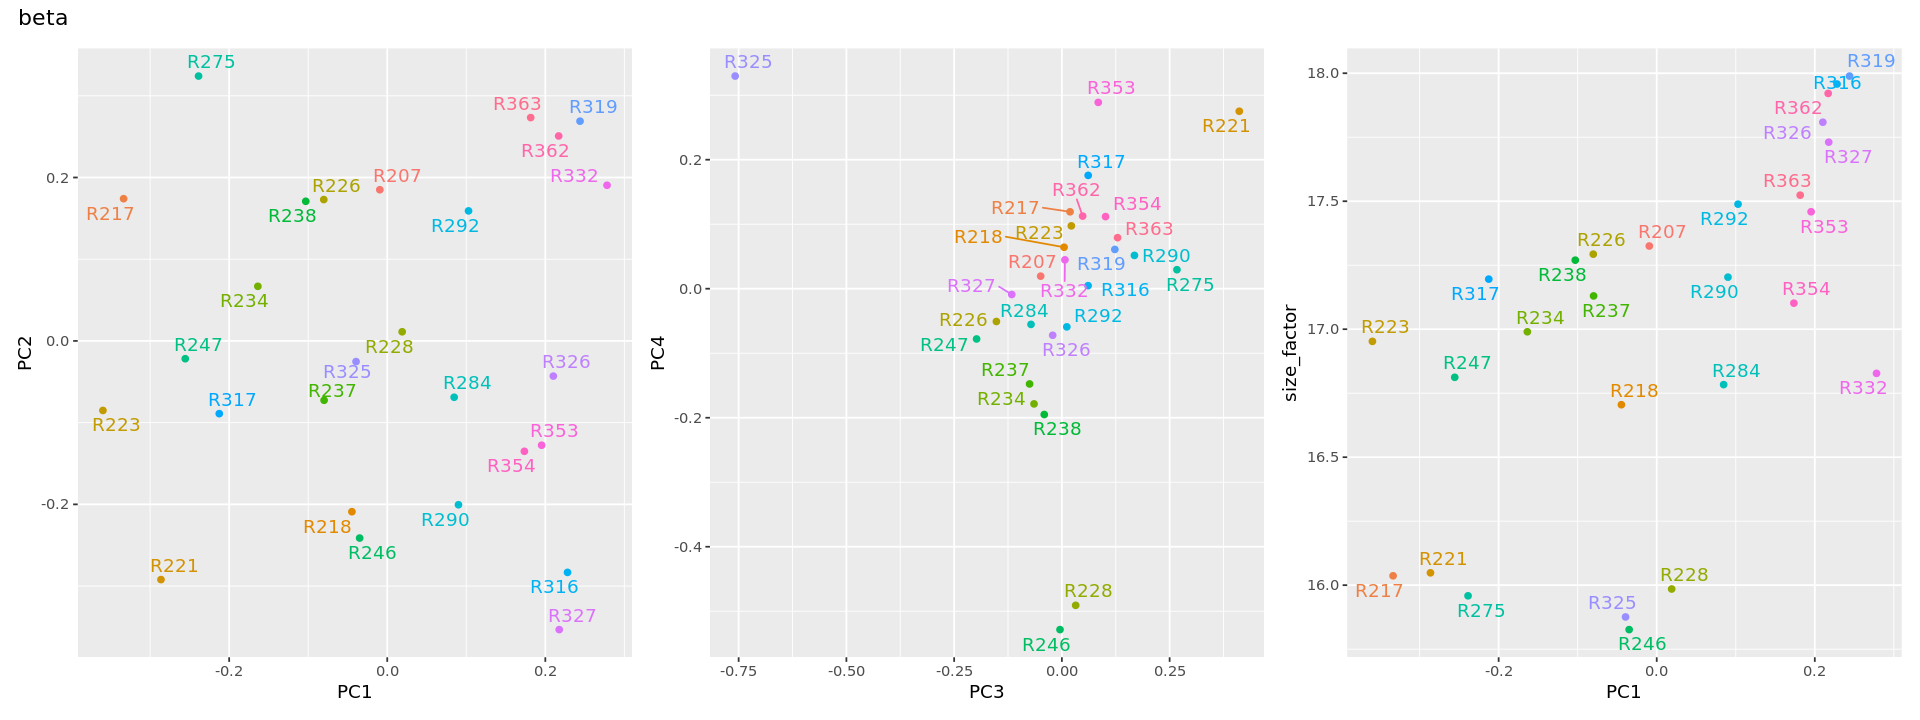

[1] "alpha"
[1] "Outlier samples found for PC3: R218"
[1] "Outlier samples found for PC4: R217"


Warning message:
“ggrepel: 13 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


[1] "acinar"
[1] "Outlier samples found for PC2: R292"
[1] "Outlier samples found for PC3: R317"
[1] "Outlier samples found for PC4: R218"


Warning message:
“ggrepel: 14 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


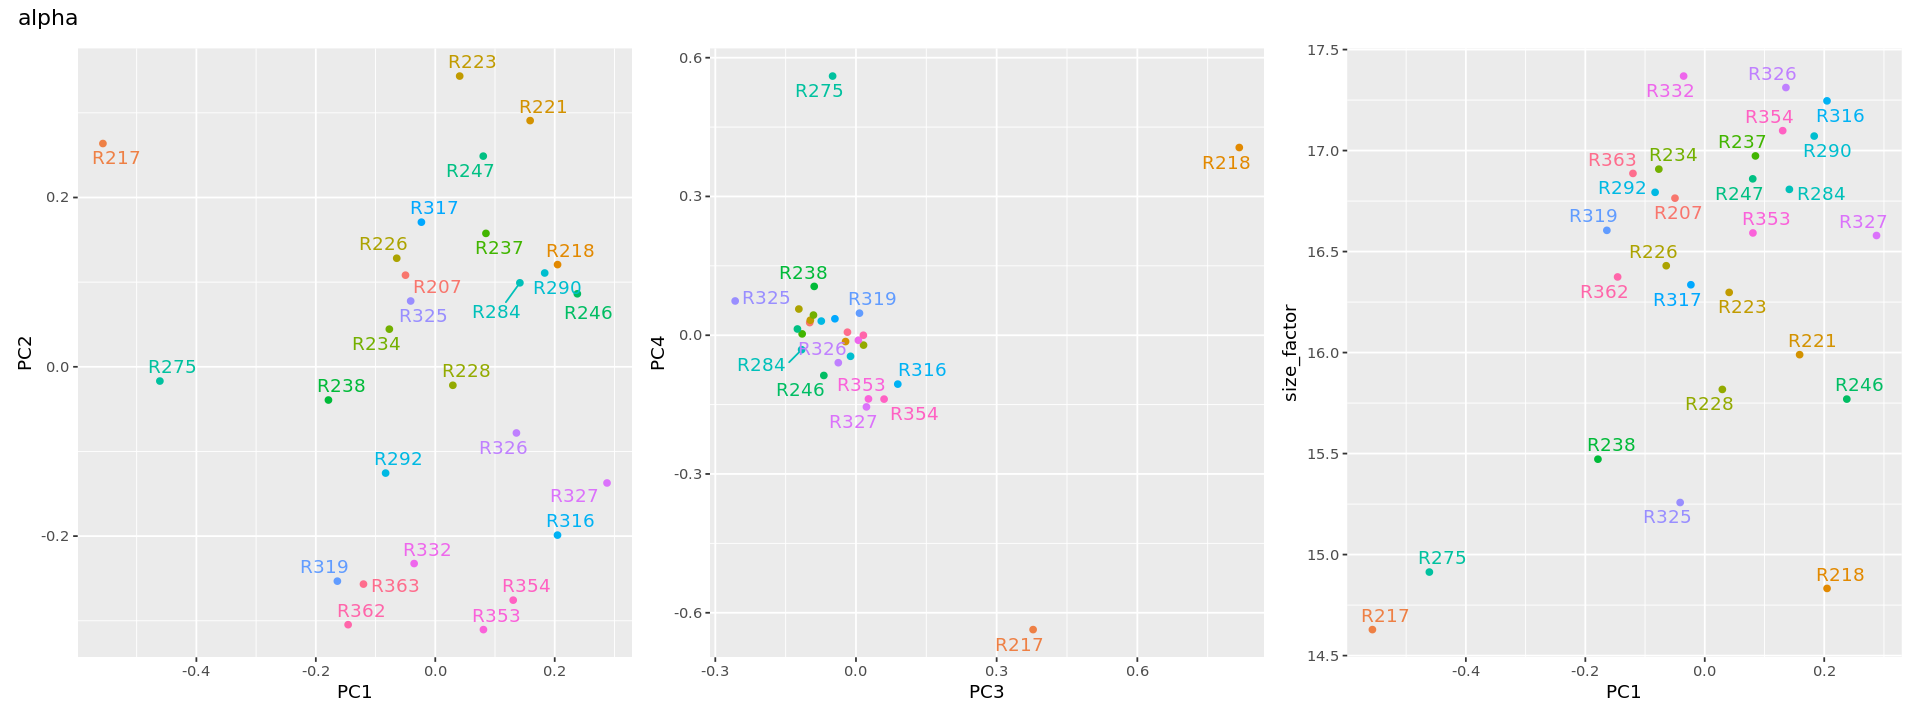

Warning message:
“ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


[1] "delta"
[1] "Outlier samples found for PC4: R228"


Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


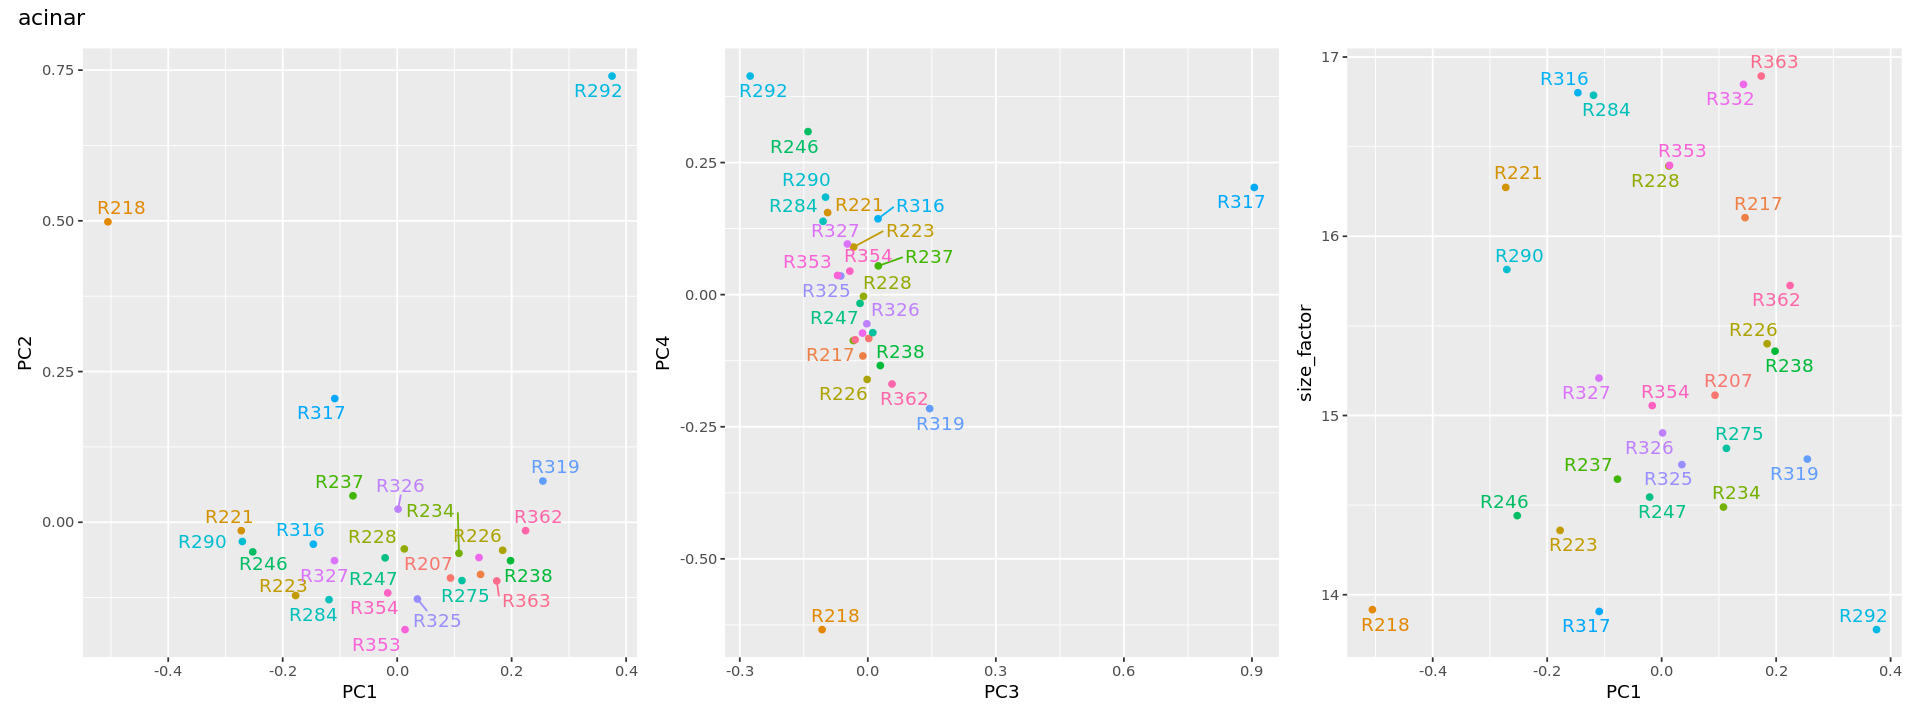

Warning message:
“ggrepel: 18 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 15 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


[1] "gamma"
[1] "Outlier samples found for PC1: R238"
[1] "Outlier samples found for PC2: R363"
[1] "Outlier samples found for PC3: R275"
[1] "Outlier samples found for PC4: R221"


Warning message:
“ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


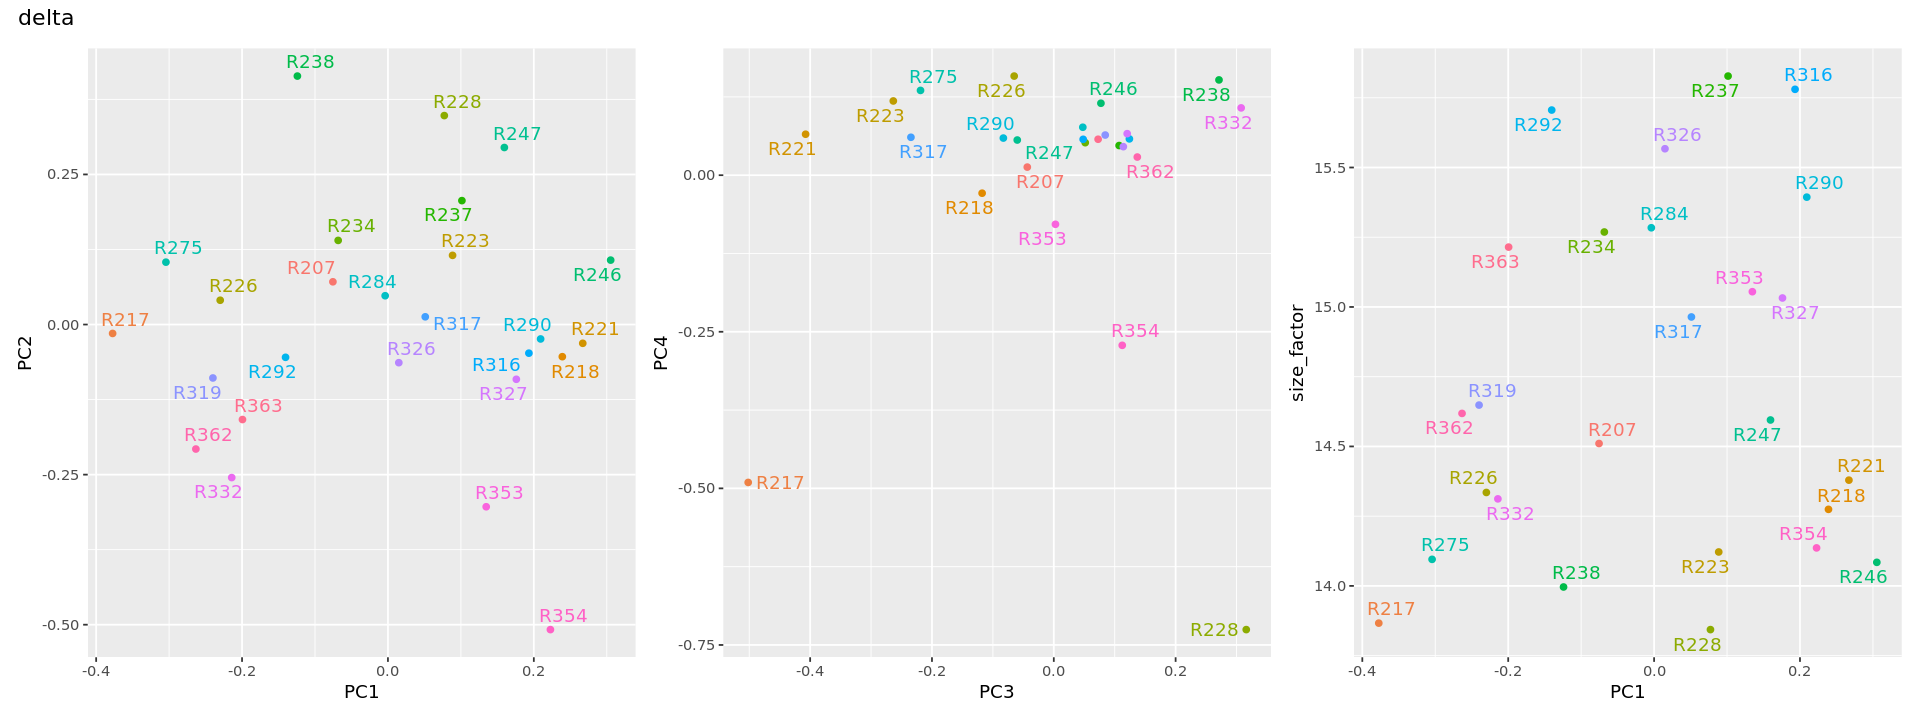

Warning message:
“ggrepel: 21 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 19 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


[1] "immune"
[1] "Outlier samples found for PC1: R221"
[1] "Outlier samples found for PC2: R226"
[1] "Outlier samples found for PC3: R217"
[1] "Outlier samples found for PC4: R246"


Warning message:
“ggrepel: 19 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


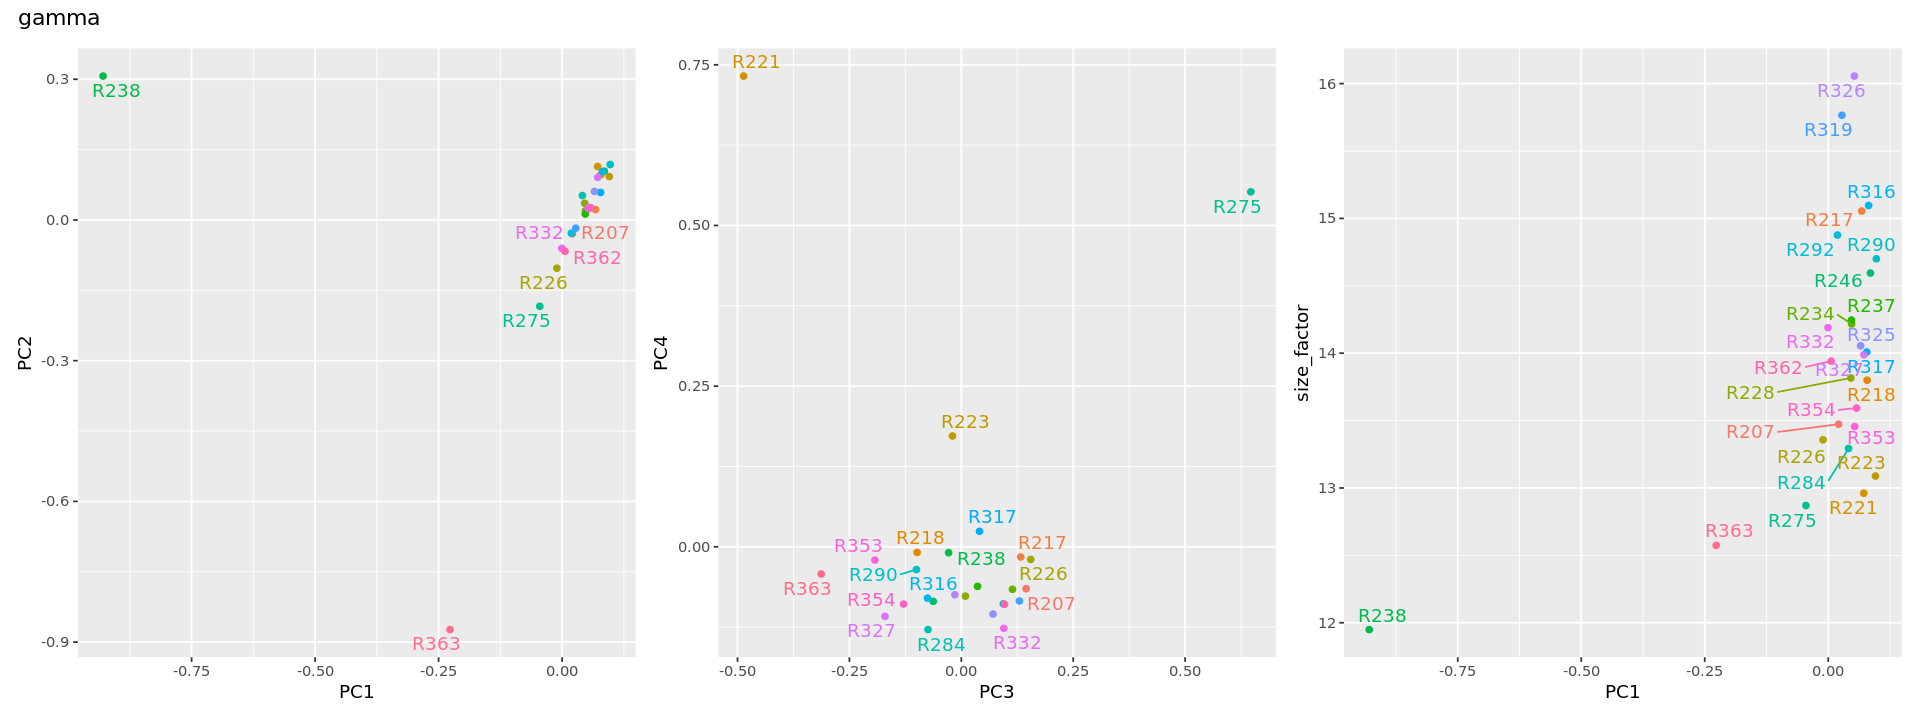

Warning message:
“ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 19 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


[1] "ductal"
[1] "Outlier samples found for PC1: R317"
[1] "Outlier samples found for PC2: R207"
[1] "Outlier samples found for PC3: R207"
[1] "Outlier samples found for PC4: R354"


Warning message:
“ggrepel: 21 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 18 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


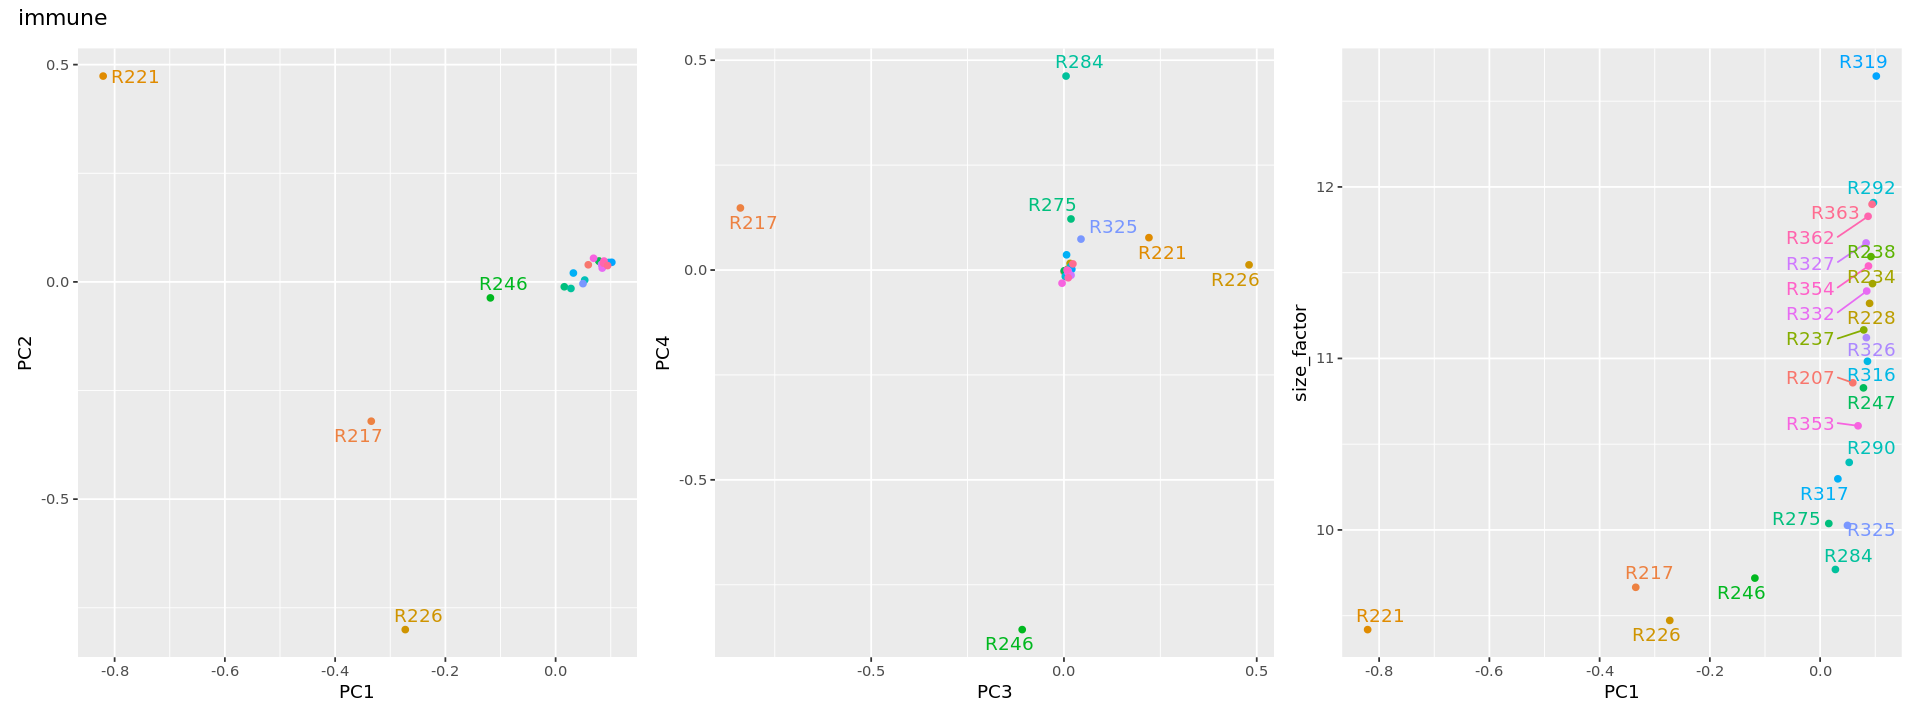

Warning message:
“ggrepel: 19 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 21 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


[1] "stellate"
[1] "Outlier samples found for PC1: R234"
[1] "Outlier samples found for PC2: R221"
[1] "Outlier samples found for PC3: R275"
[1] "Outlier samples found for PC4: R218"


Warning message:
“ggrepel: 16 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


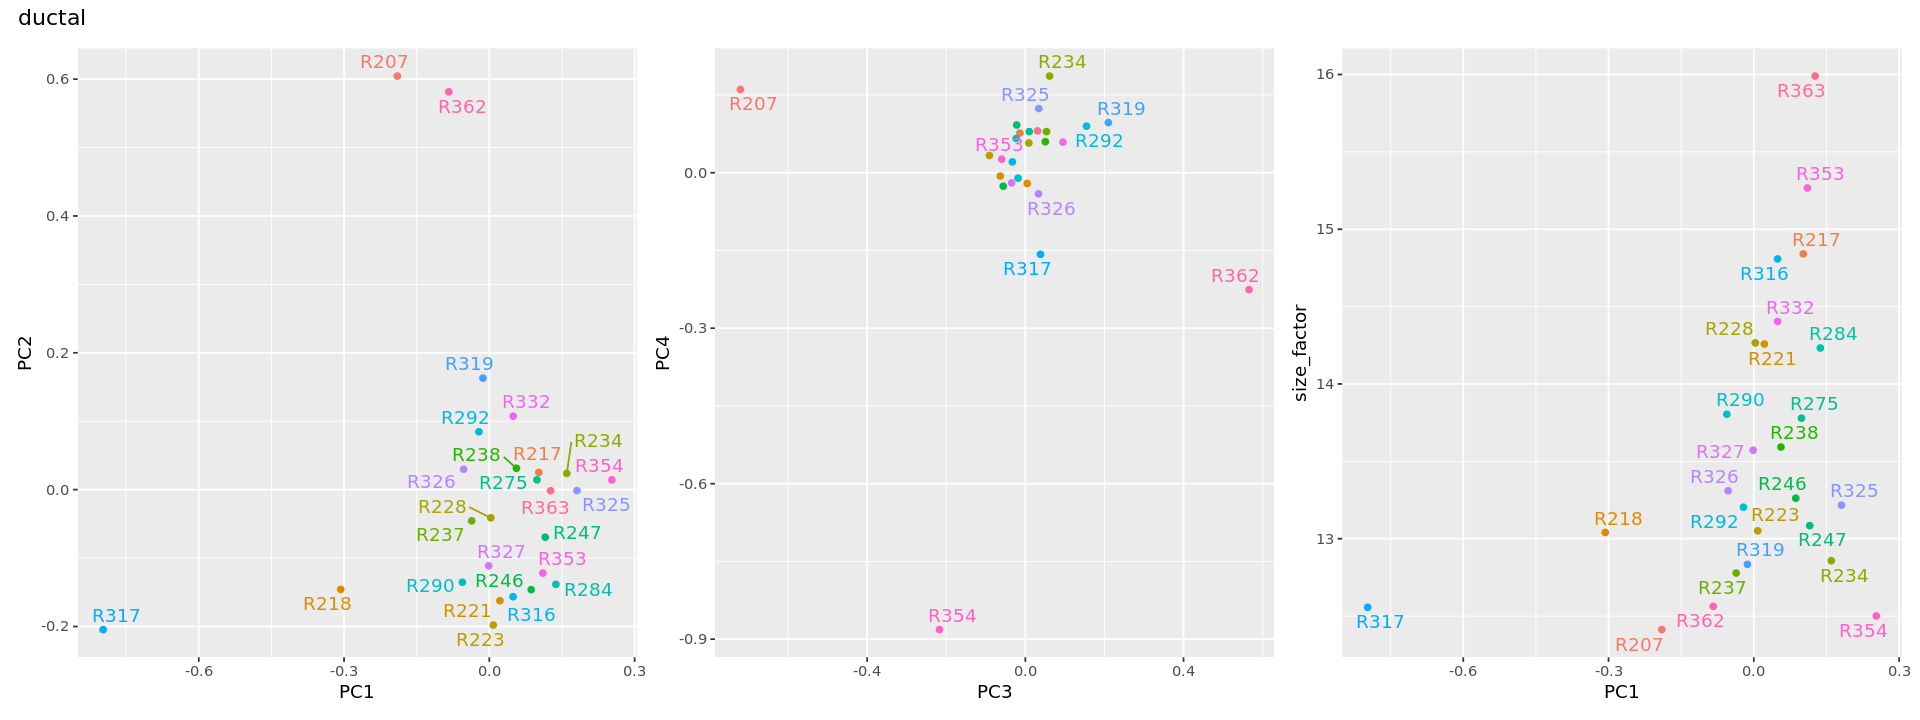

Warning message:
“ggrepel: 23 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 23 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


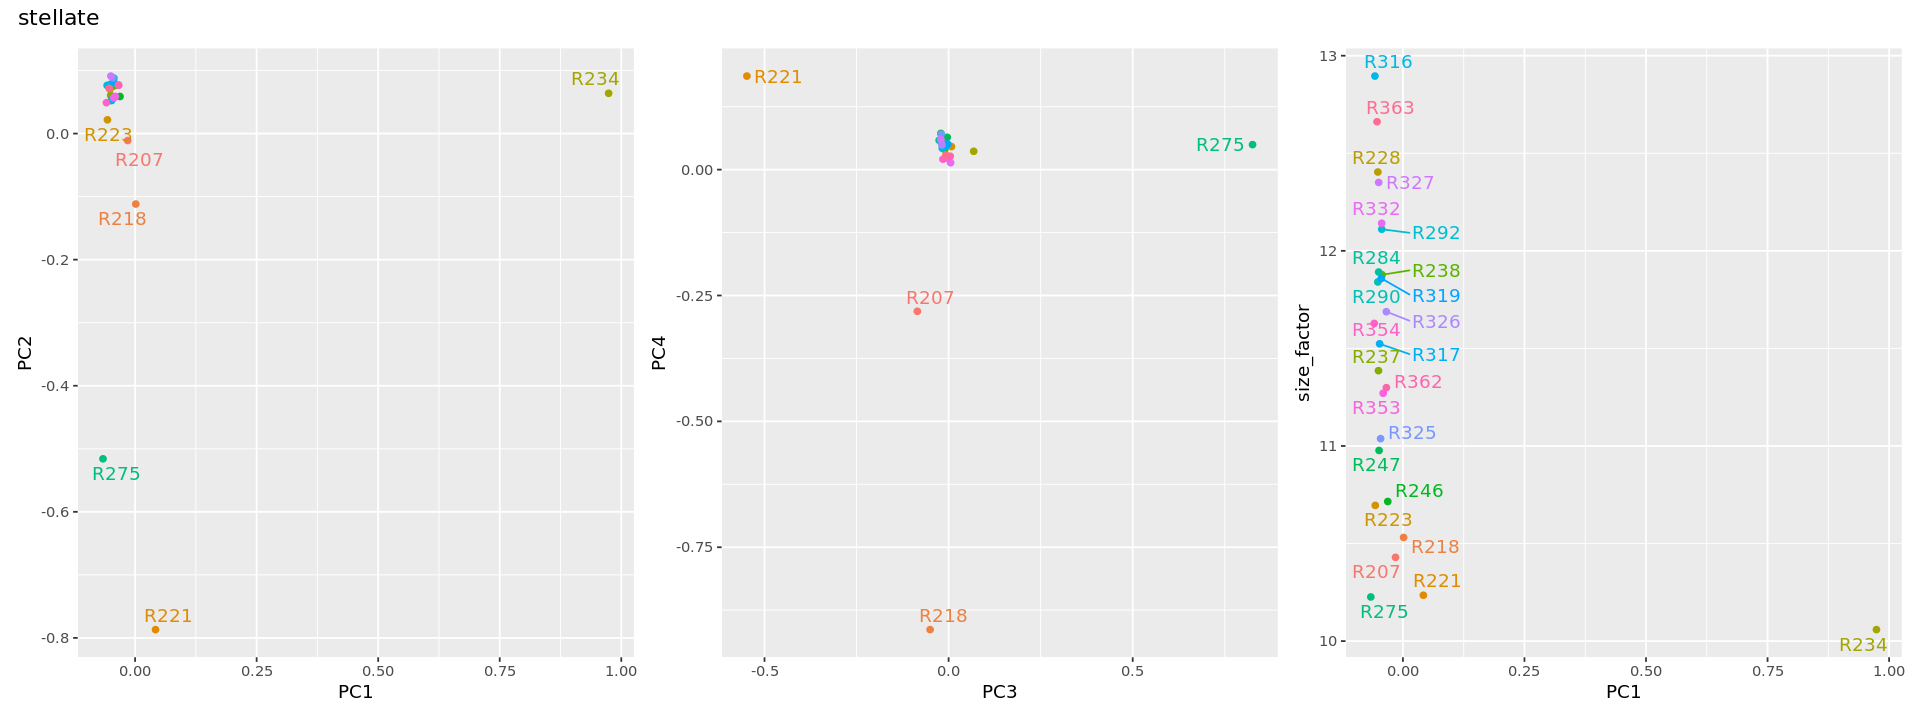

[1] "endothelial"
[1] "Outlier samples found for PC1: R226"
[1] "Outlier samples found for PC2: R217"
[1] "Outlier samples found for PC3: R246"
[1] "Outlier samples found for PC4: R218"


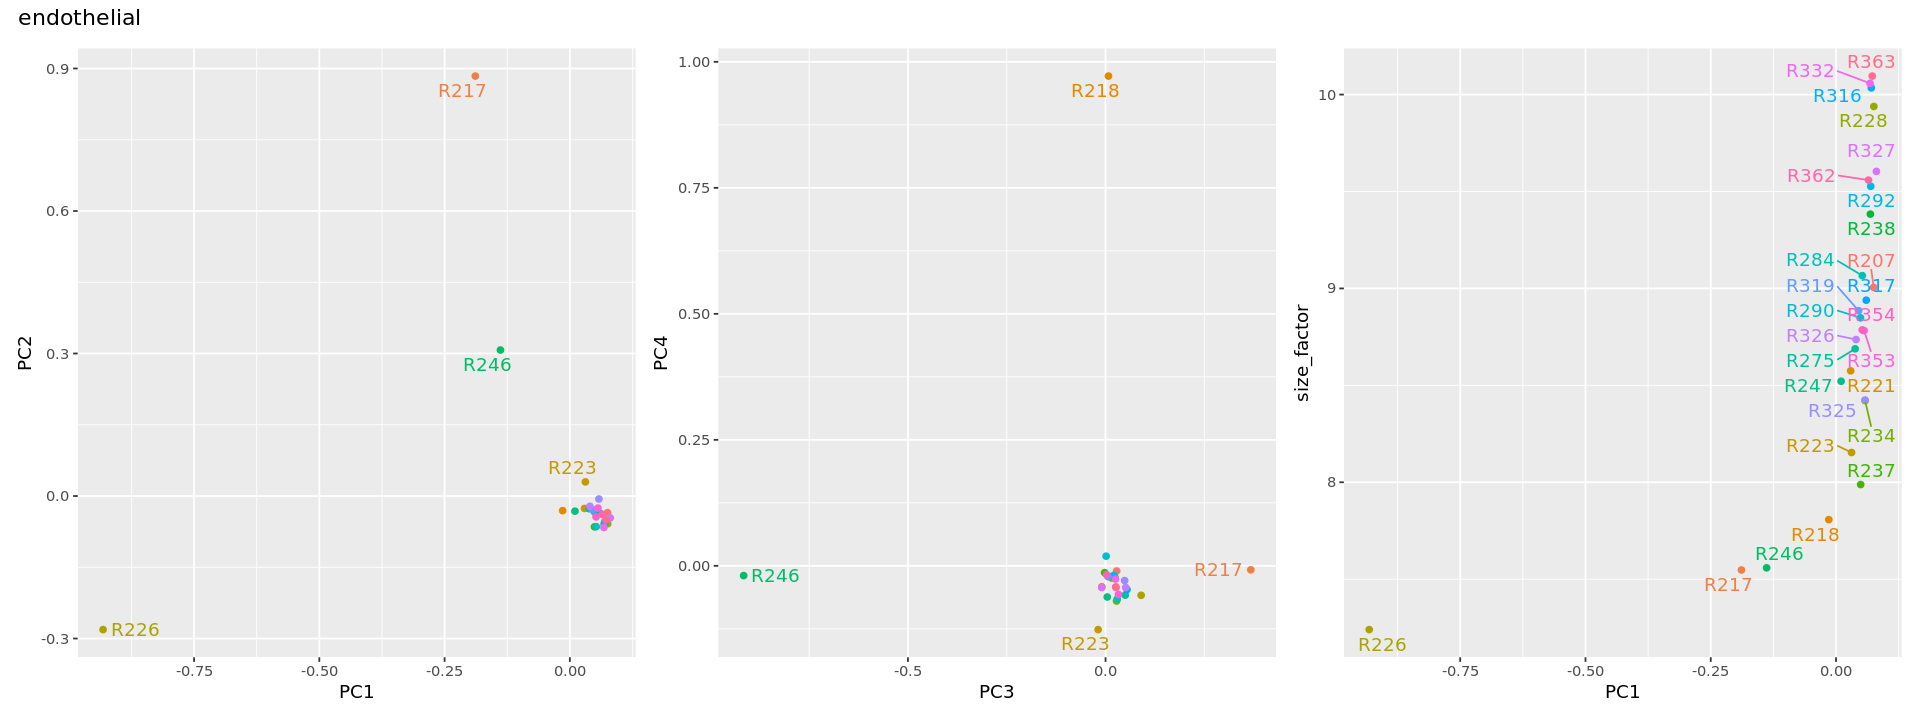

In [50]:
#Iteration #2

options(repr.plot.width=16, repr.plot.height=6)
for (c in celltypes){
    outfolder     = matdir
    pca = read.table(paste0(outfolder, "/covariates.",c, ".txt" ))
    
    if (mean(pca$V1) > 2) {
        colnames(pca) <- c('size_factor', paste0('PC', 1:(ncol(pca) - 1)))
    }else {
        colnames(pca) <- paste0('PC', 1:(ncol(pca)))
    }
    
    pca$labels <- read.table(paste0(outfolder, "samples.",c, ".csv" ), sep=',')[[1]]
       
    p1 <- ggplot(pca, aes(x=PC1, y=PC2, col=labels, label=labels)) + geom_point() + geom_text_repel() + theme(legend.position = "none")
    p2 <- ggplot(pca, aes(x=PC3, y=PC4, col=labels, label=labels)) + geom_point() + geom_text_repel() + theme(legend.position = "none")
    p3 <- ggplot(pca, aes(x=PC1, y=size_factor, col=labels, label=labels)) + geom_point() + geom_text_repel() + theme(legend.position = "none")
        
    print(p1 + p2 + p3 + plot_annotation(title = c))
    #print(p1)
    #print(p1 + p2)
    ##Check for outliers
    rownames(pca) <- pca$labels
    
    print(c)
    identify_outlier_samples(pca, 'PC1')
    identify_outlier_samples(pca, 'PC2')
    identify_outlier_samples(pca, 'PC3')
    identify_outlier_samples(pca, 'PC4')
}

## Add other covariates

In [81]:
codir = '/data/covariates/'

In [82]:
meta = read.table(paste0(codir, 'metadata'), sep="\t", header=T)

In [83]:
meta = meta[match(samples, meta$Record.ID),]
meta <- dplyr::select(meta, -vials.sent, -BMI., -HbA1c.)
meta$Sex. <- as.numeric(as.factor(meta$Sex.))*0.1

In [84]:
meta

,Record.ID,Age.,Sex.
,<chr>,<int>,<dbl>
2,R207,50,0.1
4,R217,71,0.1
5,R218,73,0.1
6,R221,44,0.2
7,R223,54,0.2
9,R226,30,0.1
10,R228,45,0.1
11,R234,50,0.1
12,R237,61,0.2


In [85]:
geno_pca <- read.table('/path/to/geno_pca/1KG/23.11.15_PCA_Subset_To_28_Samps.tsv', header=T)[,1:5]

colnames(geno_pca) <- paste0(colnames(geno_pca),".geno")

dim(geno_pca)
head(geno_pca)

[1] 28  5

,Sample.geno,PC1.geno,PC2.geno,PC3.geno,PC4.geno
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,R207,-0.0136771,-0.0257629,0.000540304,-0.0164480
2,R217,-0.0133639,-0.0269158,0.001490370,-0.0184497
3,R218,-0.0134683,-0.0262666,0.001428050,-0.0184479
4,R221,-0.0144351,0.0150745,-0.060135700,0.0262253
5,R223,-0.0133484,-0.0267527,0.001294120,-0.0189483
6,R226,-0.0132816,-0.0266117,-0.000230947,-0.0181604


In [86]:
meta <- dplyr::inner_join(meta, geno_pca, dplyr::join_by(Record.ID==Sample.geno), suffix=c("",".geno"))

dim(meta)
head(meta)

[1] 28  7

,Record.ID,Age.,Sex.,PC1.geno,PC2.geno,PC3.geno,PC4.geno
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,R207,50,0.1,-0.0136771,-0.0257629,0.000540304,-0.0164480
2,R217,71,0.1,-0.0133639,-0.0269158,0.001490370,-0.0184497
3,R218,73,0.1,-0.0134683,-0.0262666,0.001428050,-0.0184479
4,R221,44,0.2,-0.0144351,0.0150745,-0.060135700,0.0262253
5,R223,54,0.2,-0.0133484,-0.0267527,0.001294120,-0.0189483
6,R226,30,0.1,-0.0132816,-0.0266117,-0.000230947,-0.0181604


In [88]:
for (c in celltypes){
    outfolder     = '/path/to/caQTL/stuff/atac_cell_type_matrices/'
    y =  paste0(outfolder, "/counts.",c, ".txt" )
    k =  paste0(outfolder, "/size_factors.",c, ".txt" )
    x =  paste0(outfolder, "/covariates.",c, ".txt" )
    #x2 = paste0(outfolder, "/covariates2.",c, ".txt" )
    x2 = paste0(outfolder, "/covariates_full.",c, ".txt" )
    
    meta_sub <- dplyr::filter(meta, Record.ID %in% read.table(paste0(outfolder, "/samples.",c, ".csv" ), sep=',')[[1]])
    
    #make_covariates (ytxt=y, ktxt=k, outfile=x) ###recalculate original ones 
    #newcov = cbind(read.table(x), read.table(paste0(codir, "4_gt_pcs")))
    newcov = cbind(read.table(x),dplyr::select(meta_sub, -Record.ID))# , 
            #   c(rep(0.1,16), rep( 0.2,4)) ,pcas[eur,]) 
            #   read.table(paste0(codir, "4_gt_pcs")))
    
    print(newcov)

    write.table(newcov, x2, col=F,row=F,sep="\t",quote=F)
    txt2bin(ytxt=y, ktxt=k, xtxt=x2)
}

         V1           V2          V3           V4          V5           V6 Age.
1  18.48368  0.112520720 -0.20432763  0.006374424 -0.05089671  0.029766795   50
2  18.19169  0.396720345  0.12545663  0.265501128  0.10026502  0.066913872   71
3  18.20813  0.070504235 -0.05618739 -0.207111555  0.24280511 -0.013521627   73
4  17.91777  0.142182137  0.42544486  0.006147741  0.06086309 -0.437892251   44
5  18.04440  0.374892172 -0.06146855 -0.149410208  0.14604106 -0.021051254   54
6  18.18476  0.105862048 -0.17749451  0.072630980 -0.11798022  0.073122452   30
7  18.29719  0.007003466  0.29744087  0.169211280 -0.11535775 -0.047520878   45
8  18.06169  0.107437098 -0.14502589 -0.015798075 -0.20163517 -0.041866150   50
9  18.34516  0.097343722 -0.07385695 -0.196097591 -0.22903824 -0.040711228   61
10 17.99394  0.086325007 -0.15478430  0.174435599  0.04867990  0.134952186   52
11 17.16678 -0.036875670  0.12526349 -0.249711955 -0.15827026 -0.083732558   65
12 18.12562  0.233266224 -0.07810070 -0.

In [90]:
for (c in celltypes){
    outfolder     = '/path/to/caQTL/stuff/atac_cell_type_matrices/'
    
    print(c)
    print(read.table(paste0(outfolder, "/covariates_full.",c, ".txt" )))
}

[1] "bulk"
         V1           V2          V3           V4          V5           V6 V7
1  18.48368  0.112520720 -0.20432763  0.006374424 -0.05089671  0.029766795 50
2  18.19169  0.396720345  0.12545663  0.265501128  0.10026502  0.066913872 71
3  18.20813  0.070504235 -0.05618739 -0.207111555  0.24280511 -0.013521627 73
4  17.91777  0.142182137  0.42544486  0.006147741  0.06086309 -0.437892251 44
5  18.04440  0.374892172 -0.06146855 -0.149410208  0.14604106 -0.021051254 54
6  18.18476  0.105862048 -0.17749451  0.072630980 -0.11798022  0.073122452 30
7  18.29719  0.007003466  0.29744087  0.169211280 -0.11535775 -0.047520878 45
8  18.06169  0.107437098 -0.14502589 -0.015798075 -0.20163517 -0.041866150 50
9  18.34516  0.097343722 -0.07385695 -0.196097591 -0.22903824 -0.040711228 61
10 17.99394  0.086325007 -0.15478430  0.174435599  0.04867990  0.134952186 52
11 17.16678 -0.036875670  0.12526349 -0.249711955 -0.15827026 -0.083732558 65
12 18.12562  0.233266224 -0.07810070 -0.199779061 -0.

In [91]:
outfolder     = '/path/to/caQTL/stuff/atac_cell_type_matrices/'

x =  paste0(outfolder, "/covariates_full.",'beta', ".txt" )
read.table(x)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17.32503,-0.009391906,0.18504001,-0.049209281,0.019472746,-0.002117346,-0.1269261393,0.086691816,-0.029388064,50,0.1,-0.0136771,-0.02576290,5.40304e-04,-0.01644800
16.03661,-0.333544328,0.17406279,0.018936364,0.119236866,-0.001747732,-0.1344023636,0.457154757,-0.381670433,71,0.1,-0.0133639,-0.02691580,1.49037e-03,-0.01844970
16.70500,-0.044695949,-0.20899992,0.005028842,0.064296361,-0.153652756,-0.0703245958,0.090481161,0.067355268,73,0.1,-0.0134683,-0.02626660,1.42805e-03,-0.01844790
16.04828,-0.286266075,-0.29207662,0.411607812,0.275105813,0.045938510,0.5508329045,-0.047867986,-0.064957657,44,0.2,-0.0144351,0.01507450,-6.01357e-02,0.02622530
16.95255,-0.359712735,-0.08510347,0.021934849,0.097464110,0.017311317,-0.1081516862,0.045389889,-0.066800606,54,0.2,-0.0133484,-0.02675270,1.29412e-03,-0.01894830
17.29318,-0.080296503,0.17298420,-0.151949519,-0.050790836,-0.017403258,0.0134712904,0.147982465,0.152432903,30,0.1,-0.0132816,-0.02661170,-2.30947e-04,-0.01816040
15.98507,0.018887585,0.01118126,0.032017779,-0.490833265,-0.684510335,0.1354427070,-0.234520861,-0.396437703,45,0.1,-0.0134780,-0.02671550,1.57035e-03,-0.01823120
16.98994,-0.163686993,0.06684878,-0.064635018,-0.178552381,0.046167686,0.0256799469,0.171922653,0.082081203,50,0.1,-0.0134482,-0.02681950,8.82357e-04,-0.01748180
17.12999,-0.079877166,-0.07262583,-0.074939412,-0.147646323,-0.075274977,-0.0159925323,0.020897476,0.288224384,61,0.2,-0.0118791,-0.01123660,1.49069e-02,0.02268420
